<a href="https://colab.research.google.com/github/tarun422/Bike-Sharing-Demand/blob/main/SouelBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Tarun

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


###**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import warnings will not shows any warning while we make changes in dataframe
 
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# bike=pd.read_csv("/content/drive//MyDrive//Cap2/SeoulBikeData.csv", )

In [4]:
bike=pd.read_csv("/content/drive//MyDrive//Cap2/SeoulBikeData.csv", encoding='latin' )

### Dataset First View

In [5]:
# Dataset First Look

bike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
# Dataset bottom look

bike.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [7]:
# picking three random samples

bike.sample(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
592   25/12/2017                272    16              0.4           27   
475   20/12/2017                190    19             -1.5           81   
6237  17/08/2018               2008    21             27.1           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
592                2.0              2000                      -16.4   
475                1.8               751                       -4.3   
6237               1.6              2000                       13.4   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
592                      0.58           0.0            0.0  Winter   
475                      0.00           0.0            2.2  Winter   
6237                     0.00           0.0            0.0  Summer   

         Holiday Functioning Day  
592      Holiday             Yes  
475   No Holiday             Yes  
6237  No Holiday             Yes

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

bike.shape
print('Rows =',bike.shape[0] )
print('columns =',bike.shape[1])

Rows = 8760
columns = 14


### Removing feature's units 
* Features exist with there unit, so remove extra units

In [9]:
# rename columns

bike.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                     'Temperature(°C)':'Temperature',
                     'Humidity(%)':'Humidity',
                     'Wind speed (m/s)':'Wind_speed',
                     'Visibility (10m)':'Visibility',
                     'Dew point temperature(°C)':'Dew_point_temperature',
                     'Solar Radiation (MJ/m2)':'Solar_Radiation',
                     'Rainfall(mm)':'Rainfall',
                     'Snowfall (cm)':'Snowfall',
                     'Functioning Day':'Functioning_Day'},inplace=True)

### Dataset Information

#### Features Information
* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
# Dataset Info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

* Date = string object, so convert into datetime format


In [11]:
# Convert format of date column

bike['Date']=bike['Date'].astype('datetime64[ns]')

In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count check

bike.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
missing_values=bike.isnull().sum()
missing_values

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

Here is no bar so here is no missing values 


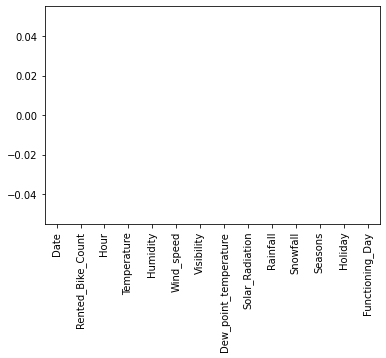

In [15]:
# Visualizing the missing values

missing_values.plot(kind='bar')
print("Here is no bar so here is no missing values ")

### What did you know about your dataset?

**Our Dataset have no duplicate value and also there is no null values and missing values**

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns

list(bike.columns)

['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning_Day']

In [17]:
# Dataset Describe
bike.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

In [18]:
bike.describe(include='all')

Date  Rented_Bike_Count         Hour  Temperature  \
count                  8760        8760.000000  8760.000000  8760.000000   
unique                  365                NaN          NaN          NaN   
top     2017-01-12 00:00:00                NaN          NaN          NaN   
freq                     24                NaN          NaN          NaN   
first   2017-01-12 00:00:00                NaN          NaN          NaN   
last    2018-12-11 00:00:00                NaN          NaN          NaN   
mean                    NaN         704.602055    11.500000    12.882922   
std                     NaN         644.997468     6.922582    11.944825   
min                     NaN           0.000000     0.000000   -17.800000   
25%                     NaN         191.000000     5.750000     3.500000   
50%                     NaN         504.500000    11.500000    13.700000   
75%                     NaN        1065.250000    17.250000    22.500000   
max                     NaN        3556.000000    23.000000    39.400000   

           Humidity   Wind_speed   Visibility  Dew_point_temperature  \
count   8760.000000  8760.000000  8760.000000            8760.000000   
unique          NaN          NaN          NaN                    NaN   
top             NaN          NaN          NaN                    NaN   
freq            NaN          NaN          NaN                    NaN   
first           NaN          NaN          NaN                    NaN   
last            NaN          NaN          NaN                    NaN   
mean      58.226256     1.724909  1436.825799               4.073813   
std       20.362413     1.036300   608.298712              13.060369   
min        0.000000     0.000000    27.000000             -30.600000   
25%       42.000000     0.900000   940.000000              -4.700000   
50%       57.000000     1.500000  1698.000000               5.100000   
75%       74.000000     2.300000  2000.000000              14.800000   
max       98.000000     7.400000  2000.000000              27.200000   

        Solar_Radiation     Rainfall     Snowfall Seasons     Holiday  \
count       8760.000000  8760.000000  8760.000000    8760        8760   
unique              NaN          NaN          NaN       4           2   
top                 NaN          NaN          NaN  Spring  No Holiday   
freq                NaN          NaN          NaN    2208        8328   
first               NaN          NaN          NaN     NaN         NaN   
last                NaN          NaN          NaN     NaN         NaN   
mean           0.569111     0.148687     0.075068     NaN         NaN   
std            0.868746     1.128193     0.436746     NaN         NaN   
min            0.000000     0.000000     0.000000     NaN         NaN   
25%            0.000000     0.000000     0.000000     NaN         NaN   
50%            0.010000     0.000000     0.000000     NaN         NaN   
75%            0.930000     0.000000     0.000000     NaN         NaN   
max            3.520000    35.000000     8.800000     NaN         NaN   

       Functioning_Day  
count             8760  
unique               2  
top                Yes  
freq              8465  
first              NaN  
last               NaN  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [19]:
# Numarical Columns

numarical_column=list(bike.describe().columns)
numarical_column

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [20]:
# Categorical Columns

list_of_categorical_column=list(bike.describe(include=['object']).columns)
list_of_categorical_column

['Seasons', 'Holiday', 'Functioning_Day']

### Check Unique Values for each categorical variable.

In [21]:
# Check Unique Values for each variable using unique() value

for i in list_of_categorical_column:
  un=bike[i].unique()
  print(i,"=",un)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']


In [22]:
# check unique values using value_counts()

for i in list_of_categorical_column:
  un=bike[i].value_counts()
  print(i,"=",un)

Seasons = Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
Holiday = No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Functioning_Day = Yes    8465
No      295
Name: Functioning_Day, dtype: int64


### Target variables Description 

In [23]:
# Target variable/Dependent Variable

y = bike['Rented_Bike_Count']
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [24]:
# Adding month column

bike['month']=bike['Date'].dt.month
bike.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
535 2017-12-23                 99     7          5.1        82         0.7   

     Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
535         334                    2.2              0.0       0.0       0.0   

    Seasons     Holiday Functioning_Day  month  
535  Winter  No Holiday             Yes     12

In [25]:
# Adding day column

bike['day']=bike['Date'].dt.day
bike.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
1119 2018-01-16                250    15          6.3        40         0.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
1119         498                   -6.3             0.19       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day  
1119  Winter  No Holiday             Yes      1   16

In [26]:
# Adding Day name column

bike['day_name']=bike['Date'].dt.day_name()
bike.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5539 2018-07-19               2245    19         31.6        58         2.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
5539        1556                   22.3             0.56       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day  day_name  
5539  Summer  No Holiday             Yes      7   19  Thursday

In [27]:
# Adding weekeed column using lamda function

bike['weekend']=bike['day_name'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bike.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5422 2018-07-14               1682    22         27.6        70         2.7   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
5422        1994                   21.6              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day  day_name  weekend  
5422  Summer  No Holiday             Yes      7   14  Saturday        1

In [28]:
bike.sample(6)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
6425 2018-08-25               1797    17         26.9        60         2.8   
2184 2018-02-03                156     0         -4.3        53         2.6   
906  2018-07-01                270    18          1.8        34         1.2   
144  2017-07-12                198     0          1.4        92         0.5   
5780 2018-07-29               1697    20         32.3        48         1.4   
7702 2018-10-17               1278    22          9.9        50         0.1   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
6425        2000                   18.4             0.77       0.0       0.0   
2184        1334                  -12.4             0.00       0.0       0.0   
906         1518                  -12.4             0.00       0.0       0.0   
144          240                    0.2             0.00       0.0       0.9   
5780        2000                   19.8             0.08       0.0       0.0   
7702        2000                    0.0             0.00       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day   day_name  weekend  
6425  Summer  No Holiday             Yes      8   25   Saturday        1  
2184  Spring  No Holiday             Yes      2    3   Saturday        1  
906   Winter  No Holiday             Yes      7    1     Sunday        1  
144   Winter  No Holiday             Yes      7   12  Wednesday        0  
5780  Summer  No Holiday             Yes      7   29     Sunday        1  
7702  Autumn  No Holiday             Yes     10   17  Wednesday        0

In [29]:
# Drop Date column

bike=bike.drop(['Date'], axis=1)
bike

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning_Day  month  day  day_name  weekend  
0     No Holiday             Yes      1   12  Thursday        0  
1     No Holiday             Yes      1   12  Thursday        0  
2     No Holiday             Yes      1   12  Thursday        0  
3     No Holiday             Yes      1   12  Thursday        0  
4     No Holiday             Yes      1   12  Thursday        0  
...          ...             ...    ...  ...       ...      ...  
8755  No Holiday             Yes     11   30    Friday        0  
8756  No Holiday             Yes     11   30    Friday        0  
8757  No Holiday             Yes     11   30    Friday        0  
8758  No Holiday             Yes     11   30    Friday        0  
8759  No Holiday             Yes     11   30    Friday        0  

[8760 rows x 17 columns]

In [30]:
# Independent Variables

x=bike.drop(['Rented_Bike_Count'], axis=1)
x

Hour  Temperature  Humidity  Wind_speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning_Day  month  day  day_name  weekend  
0     No Holiday             Yes      1   12  Thursday        0  
1     No Holiday             Yes      1   12  Thursday        0  
2     No Holiday             Yes      1   12  Thursday        0  
3     No Holiday             Yes      1   12  Thursday        0  
4     No Holiday             Yes      1   12  Thursday        0  
...          ...             ...    ...  ...       ...      ...  
8755  No Holiday             Yes     11   30    Friday        0  
8756  No Holiday             Yes     11   30    Friday        0  
8757  No Holiday             Yes     11   30    Friday        0  
8758  No Holiday             Yes     11   30    Friday        0  
8759  No Holiday             Yes     11   30    Friday        0  

[8760 rows x 16 columns]

In [31]:
# updated numarical columns

numarical_columns=list(bike.describe().columns)
numarical_columns

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'month',
 'day',
 'weekend']

In [32]:
# updated categorical columns

list_of_categorical_columns=list(bike.describe(include=['object']).columns)
list_of_categorical_columns

['Seasons', 'Holiday', 'Functioning_Day', 'day_name']

In [33]:
# unique values of categorical columns

for i in list_of_categorical_columns:
  un=bike[i].unique()
  print(i,"=",un)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']
day_name = ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Checking Outliers and univariate analysis on numarical columns




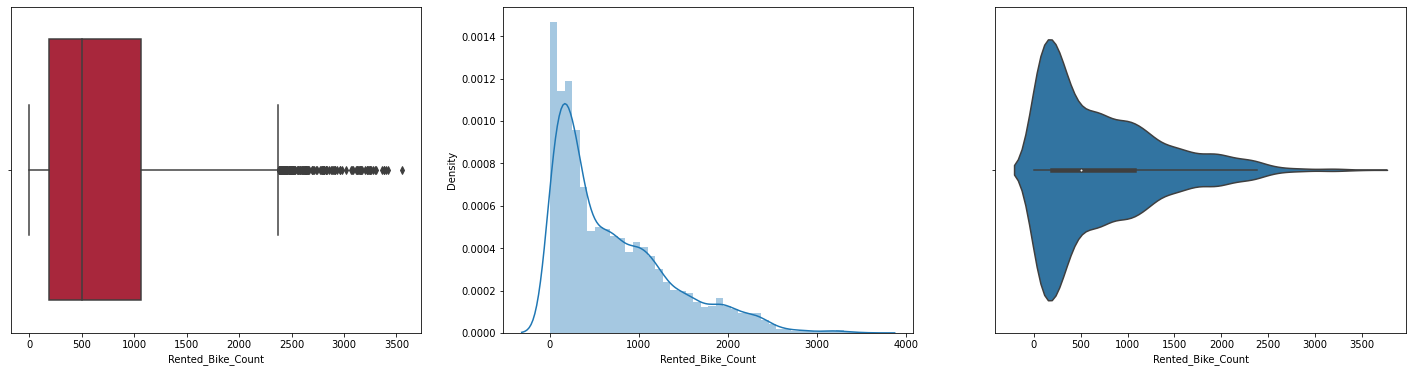

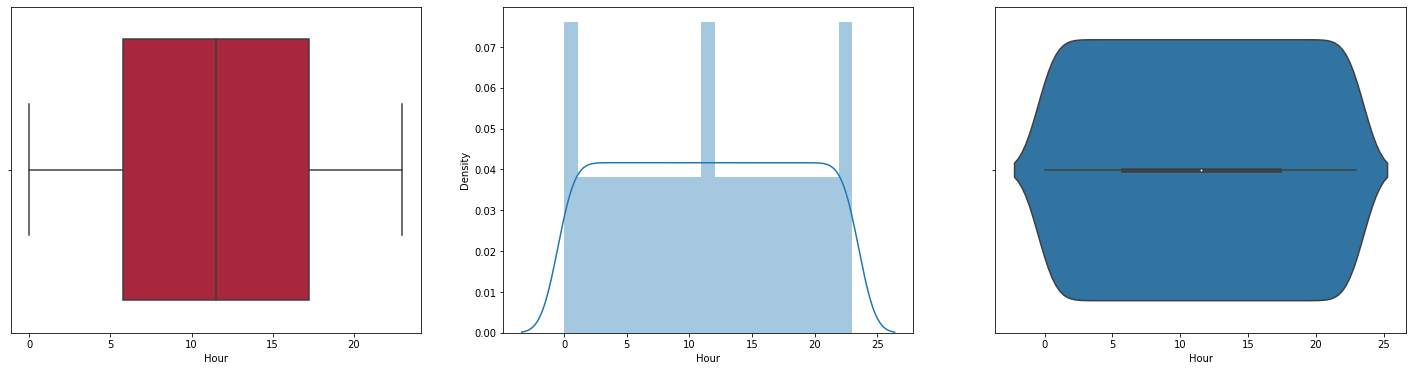

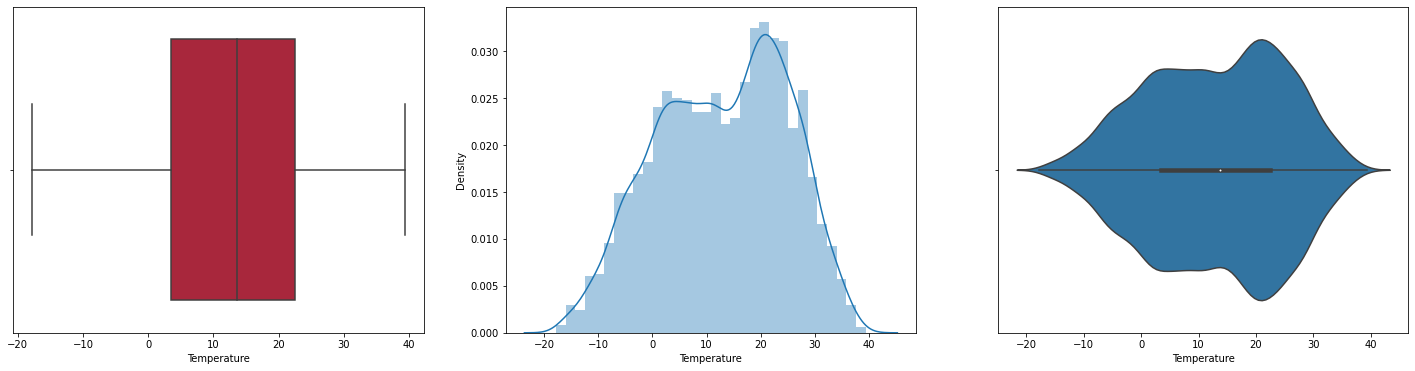

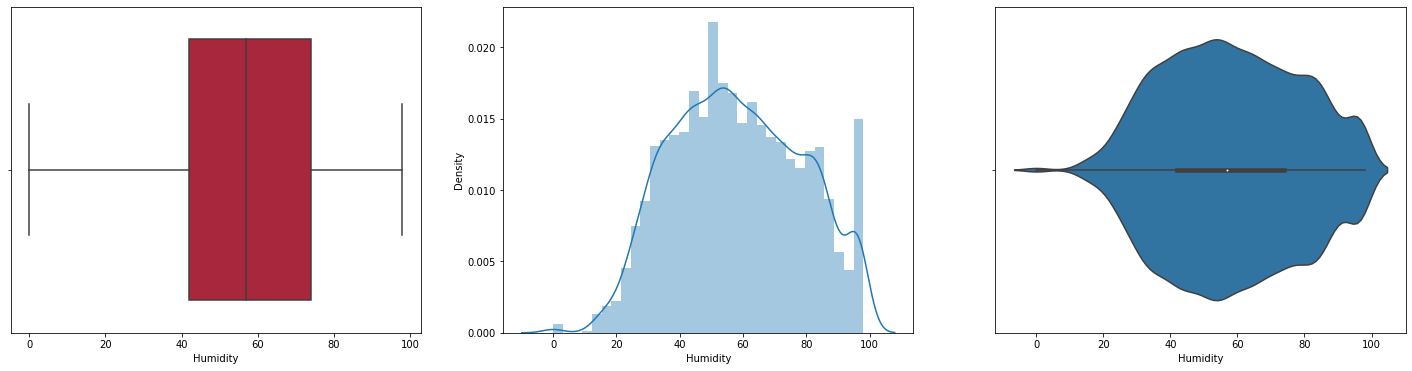

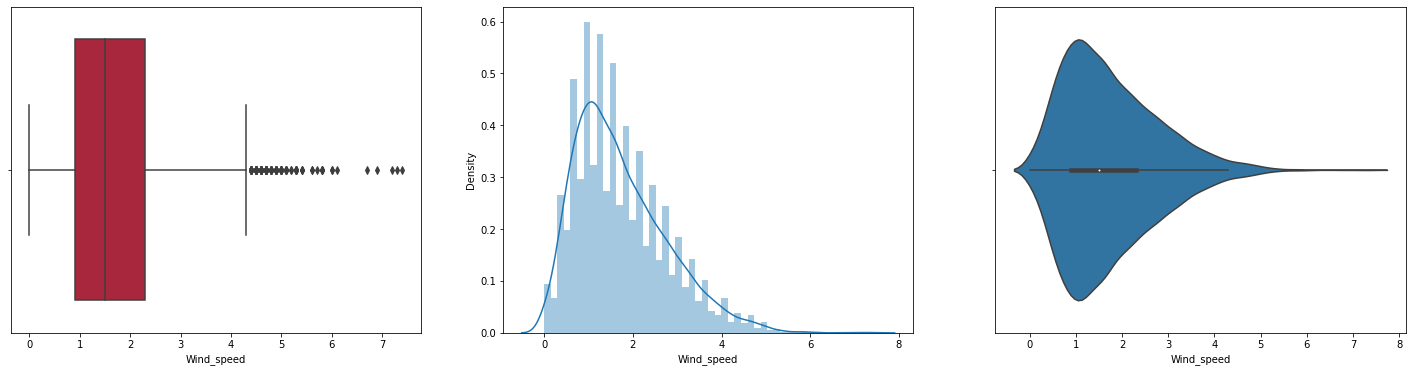

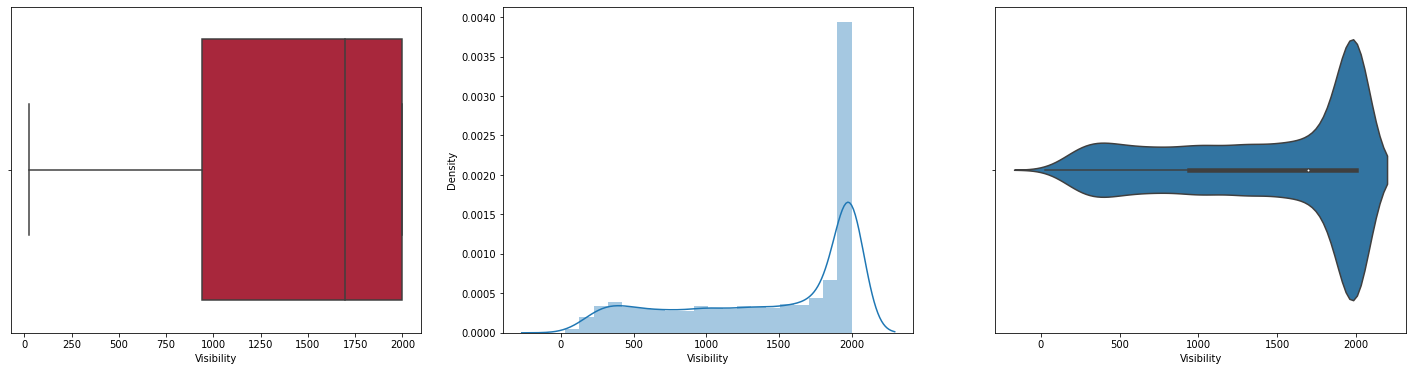

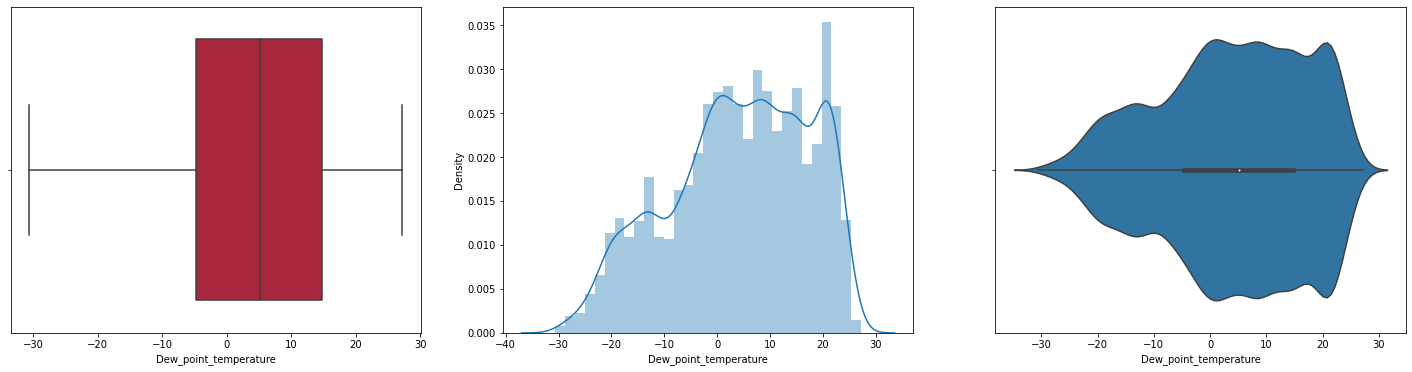

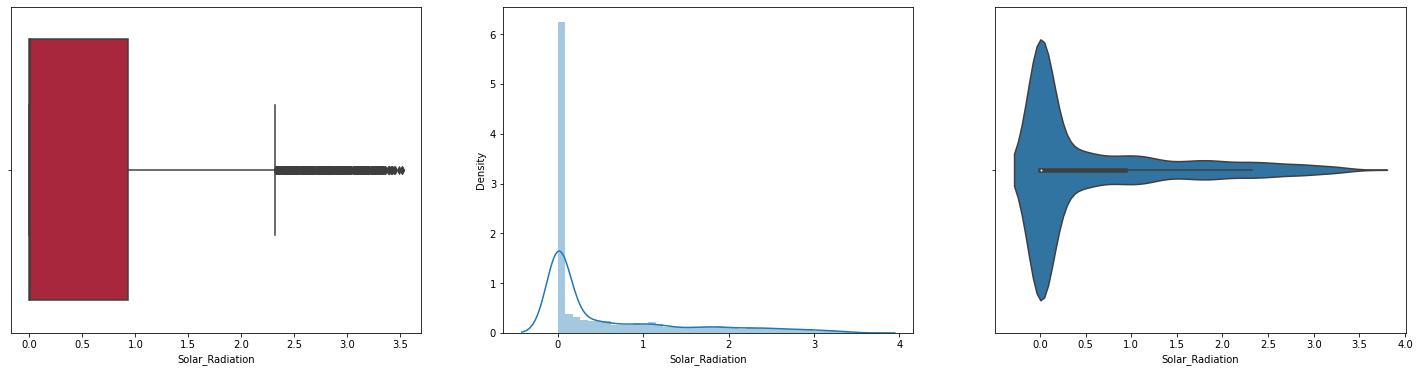

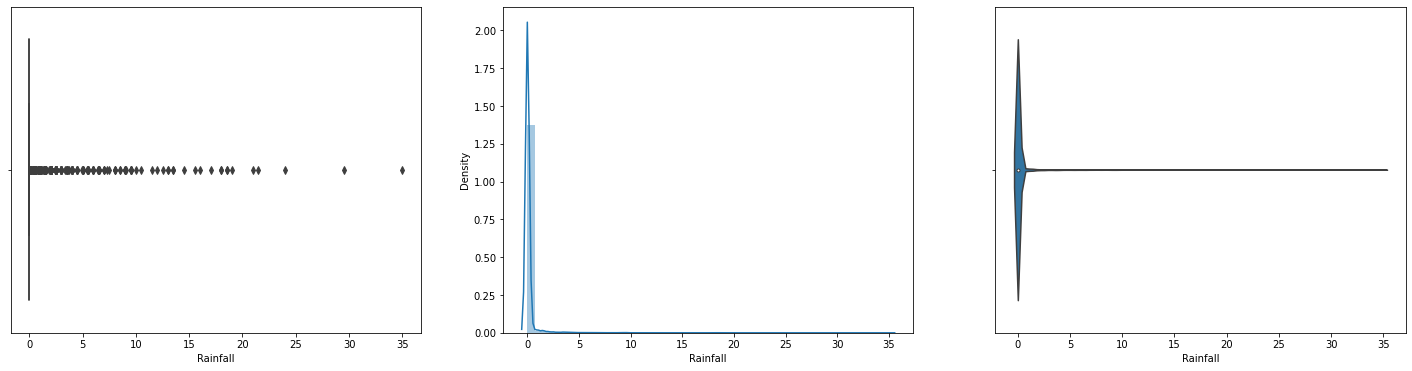

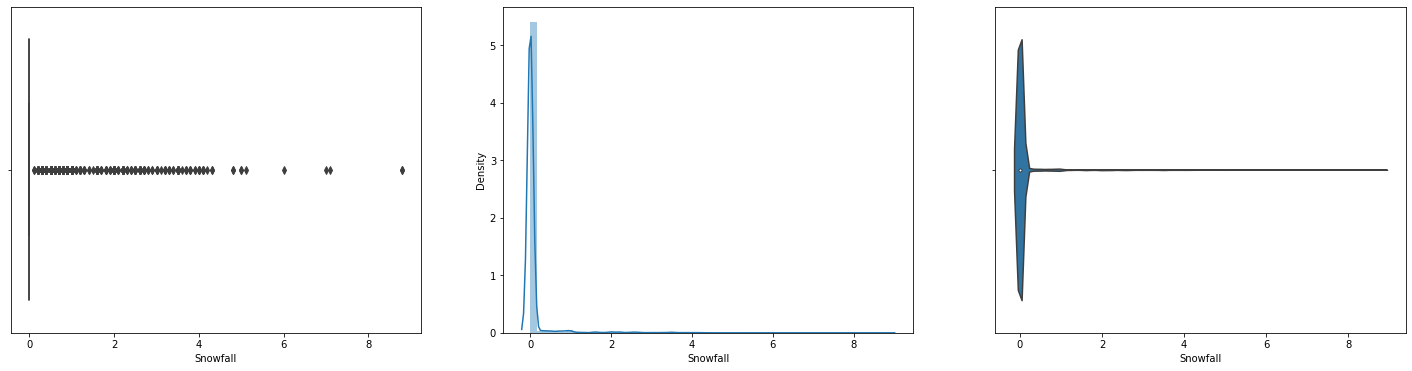

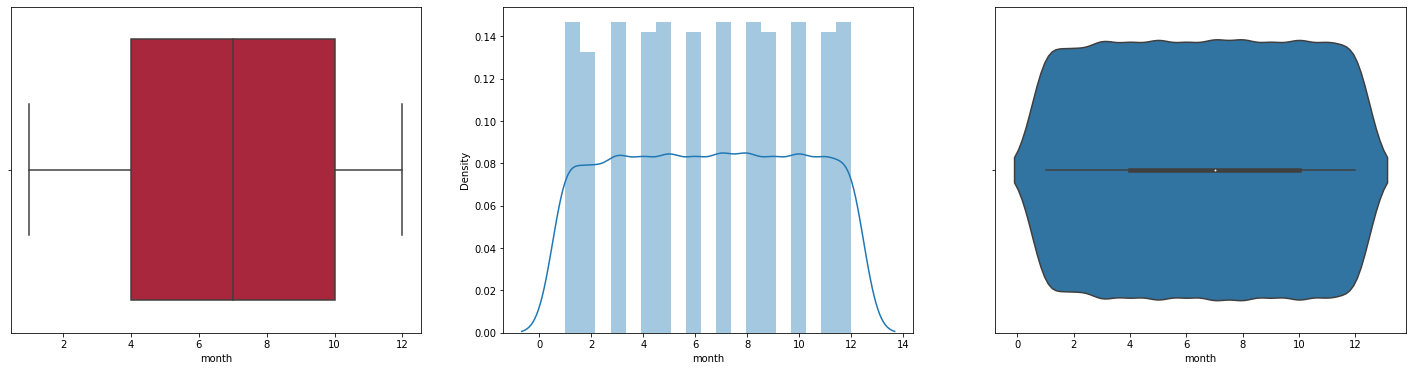

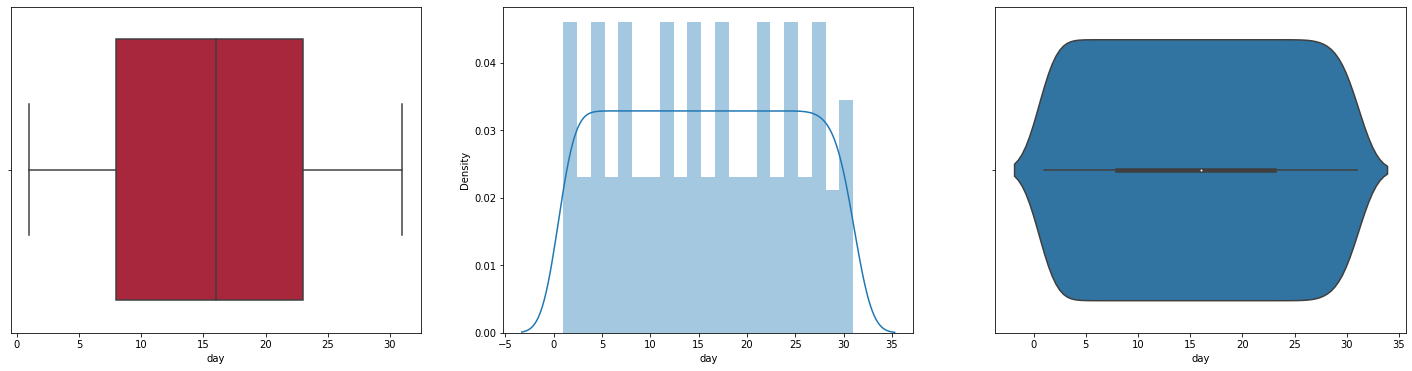

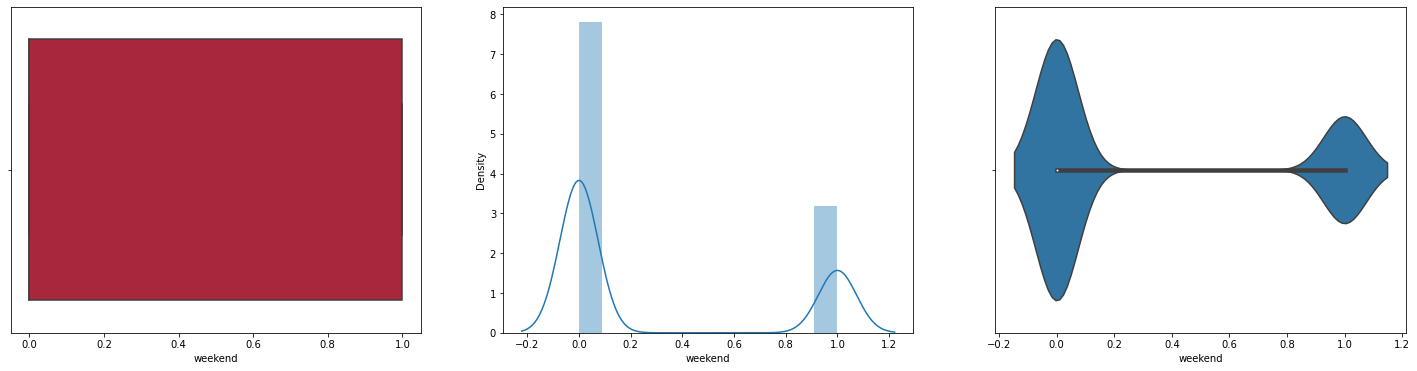

In [34]:
# checking outliers

for i in numarical_columns:
 fig = plt.figure(figsize=(25, 6))
 plt.subplot(1,3,1)
 sns.boxplot(bike[i],color='#bd112e')
 plt.subplot(1,3,2)
 sns.distplot(bike[i])
 plt.subplot(1,3,3)
 sns.violinplot(bike[i])
 plt.show()

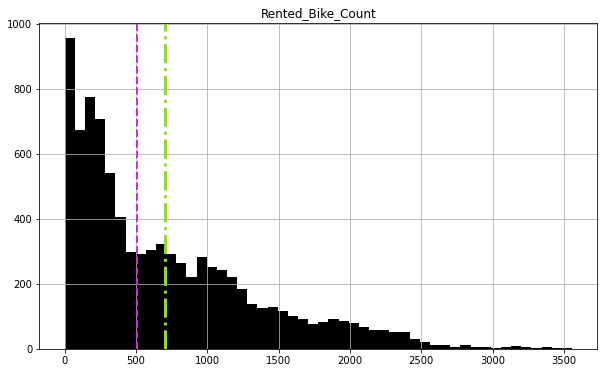

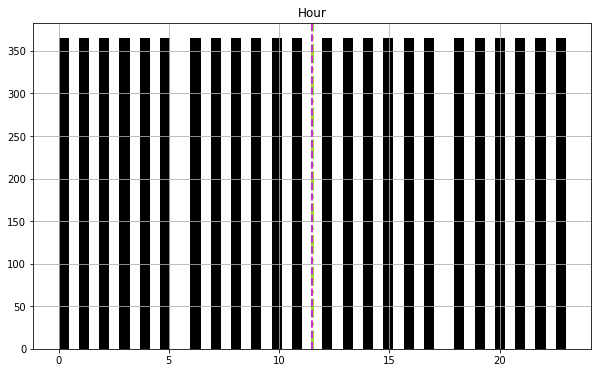

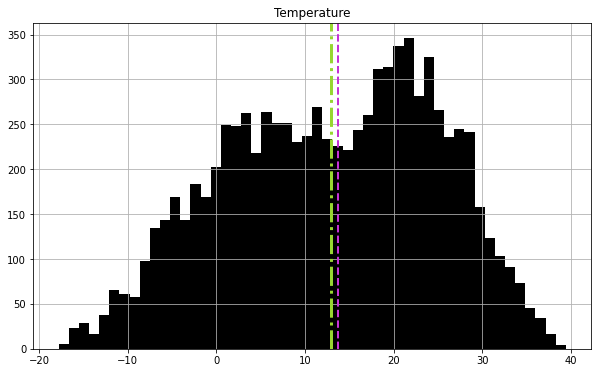

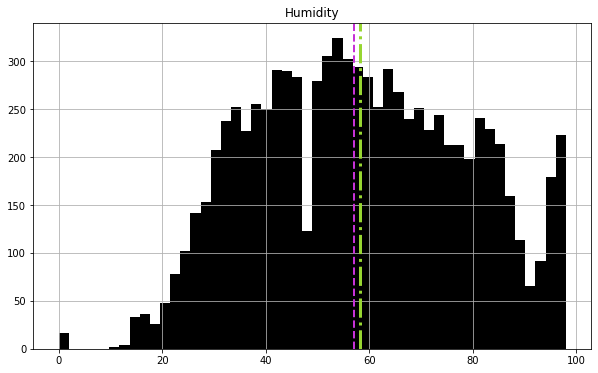

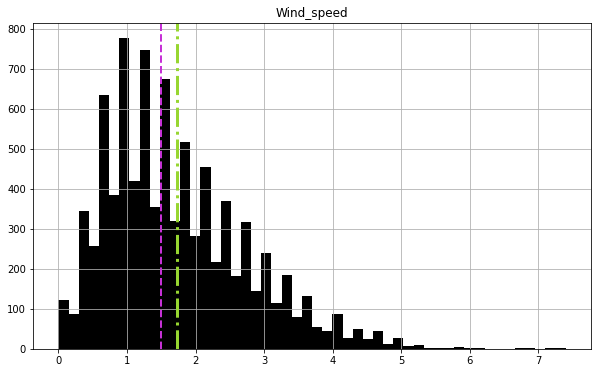

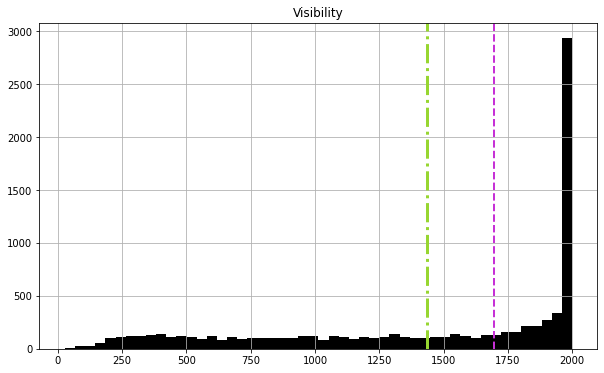

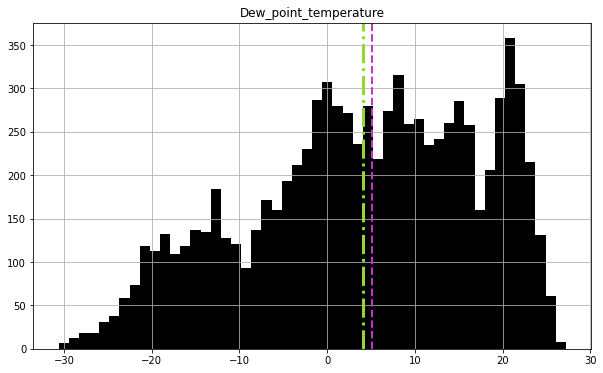

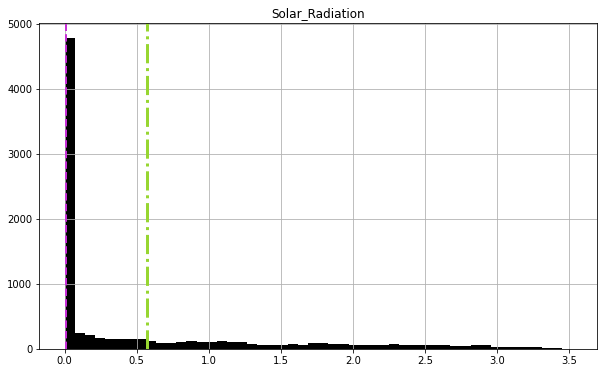

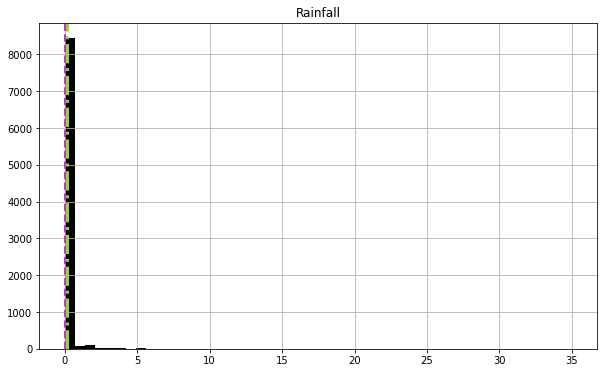

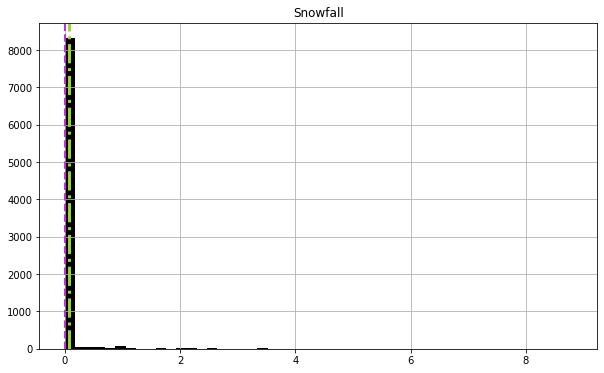

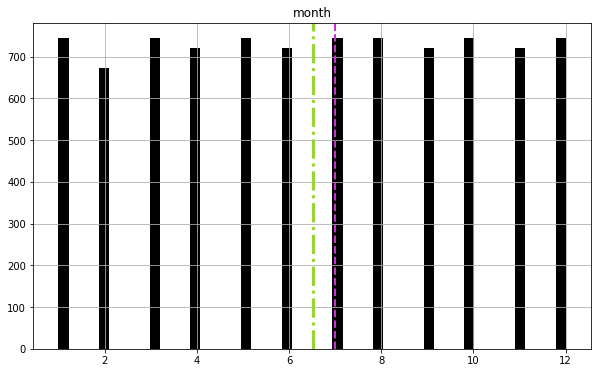

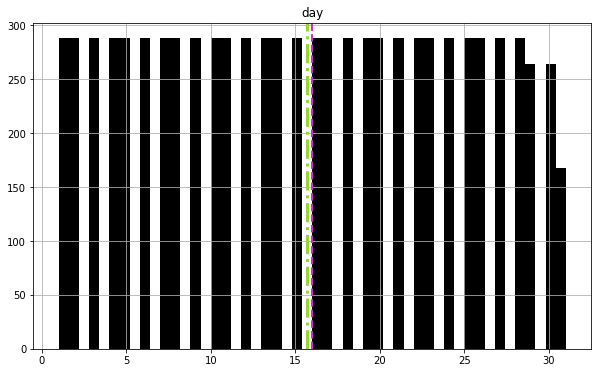

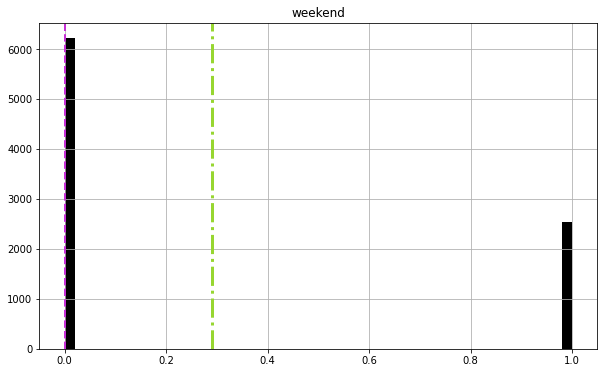

In [35]:
# Univariate Analysis

for i in numarical_columns:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = bike[i]
    feature.hist(bins=50, ax = ax,color='black')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

### Univariate Analysis on categorical columns

In [36]:
# check for value count on categorical columns

for i in list_of_categorical_columns:
  a=bike[i].value_counts()
  print(a)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning_Day, dtype: int64
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_name, dtype: int64


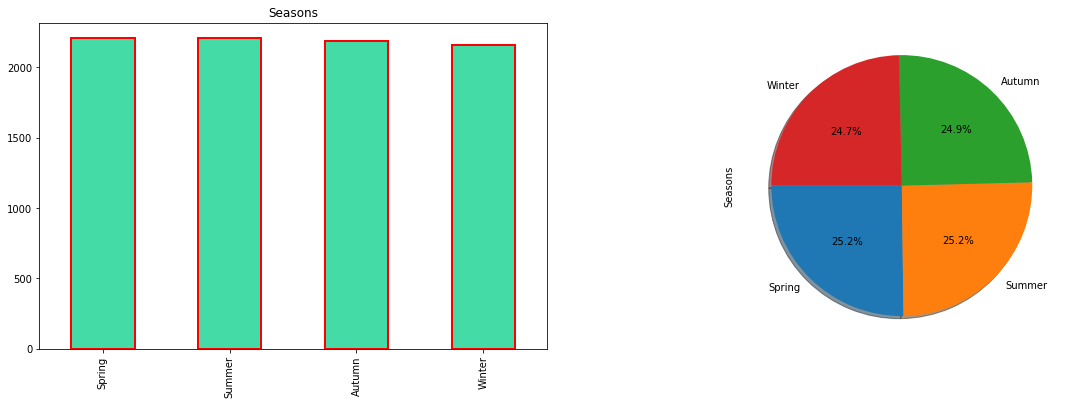

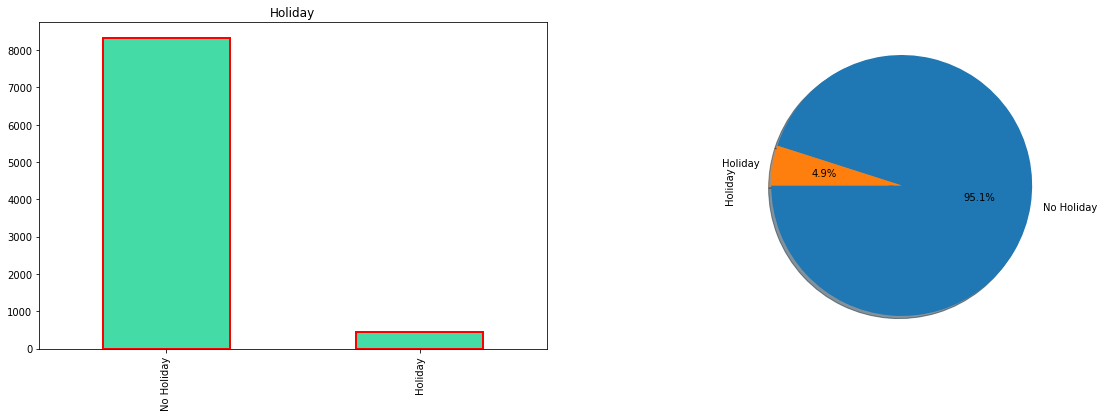

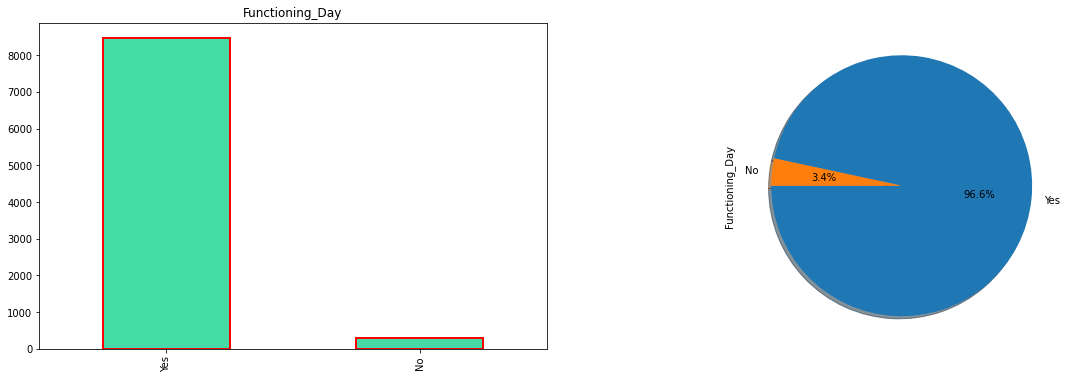

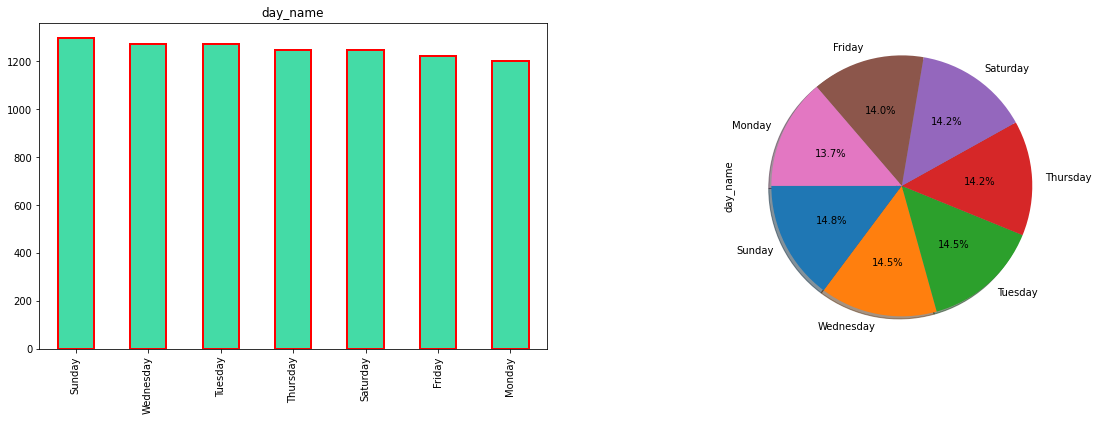

In [37]:
for i in list_of_categorical_columns:
 fig = plt.figure(figsize=(20, 6))
 plt.subplot(1,2,1)
 bike[i].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
 plt.title(i)
 plt.subplot(1,2,2)
 bike[i].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
 plt.show()

### Target variable distribution

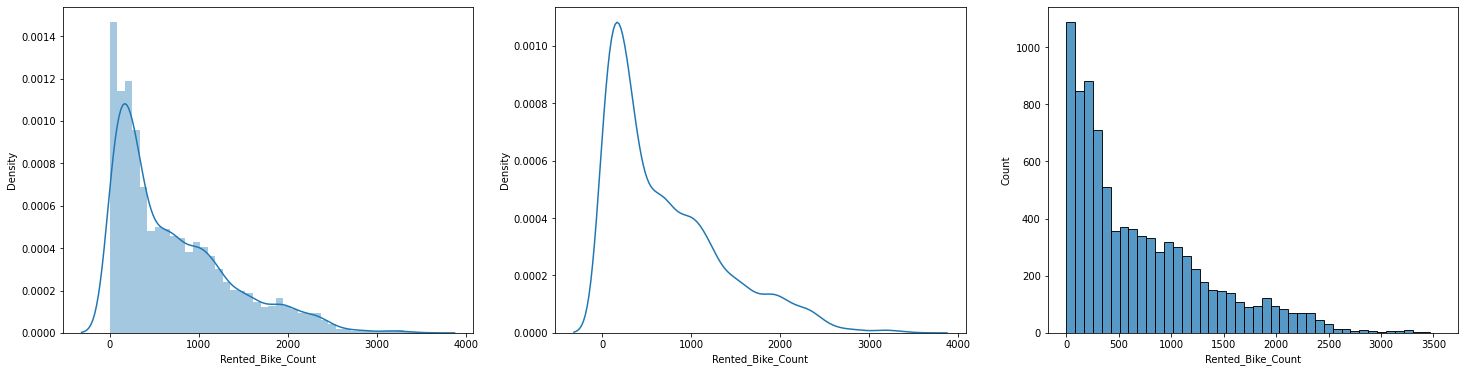

In [38]:
# Target variable distribution using distplot

fig = plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
sns.distplot(bike['Rented_Bike_Count'])
plt.subplot(1,3,2)
sns.kdeplot(bike['Rented_Bike_Count'])
plt.subplot(1,3,3)
sns.histplot(bike['Rented_Bike_Count'])

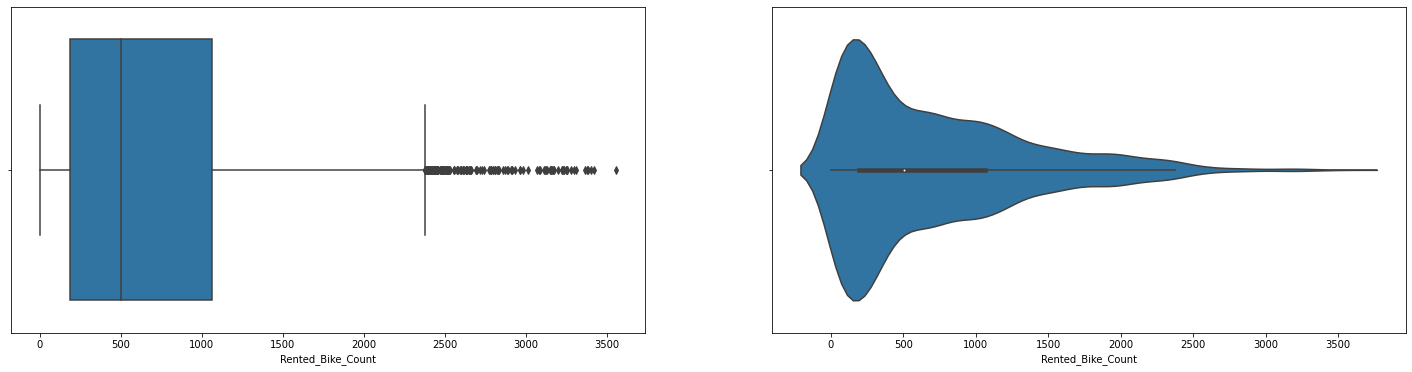

In [39]:
# box plot on target variable

fig = plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sns.boxplot(bike['Rented_Bike_Count'])
plt.subplot(1,2,2)
sns.violinplot(bike['Rented_Bike_Count'])

### Bivariate Analysis on categorical column with target column

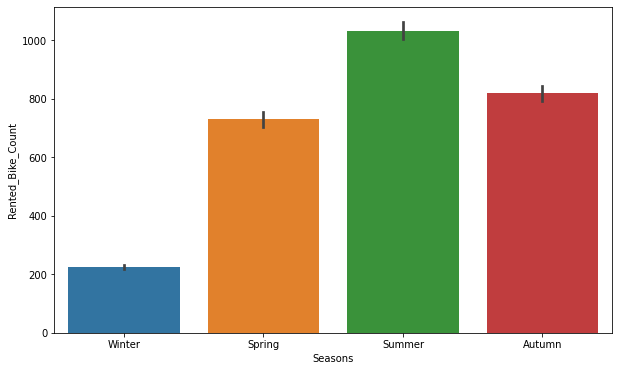

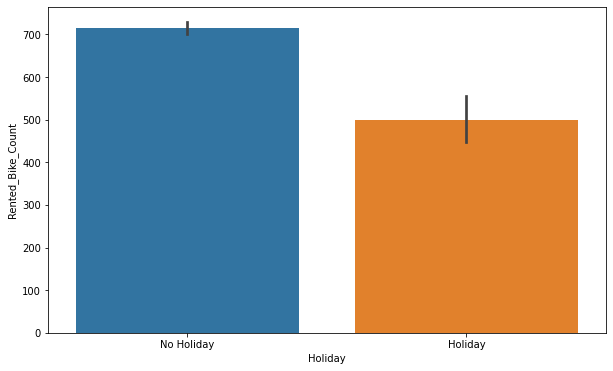

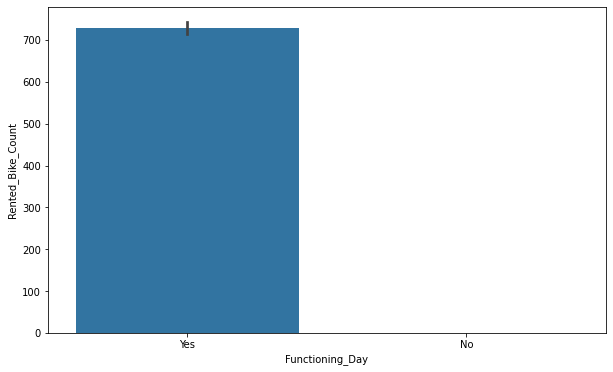

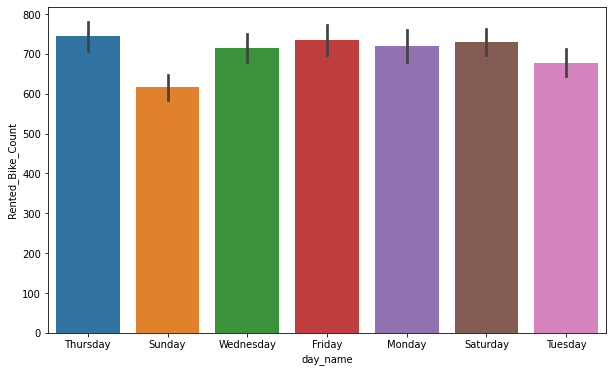

In [40]:
# Bivariate analysis of rente bike counts with each categorical column

for i in list_of_categorical_columns:
  fig = plt.figure(figsize=(10, 6))
  sns.barplot(y=bike['Rented_Bike_Count'],x=bike[i])
  plt.show()

### Bivariate Analysis of numarical columns with target variable

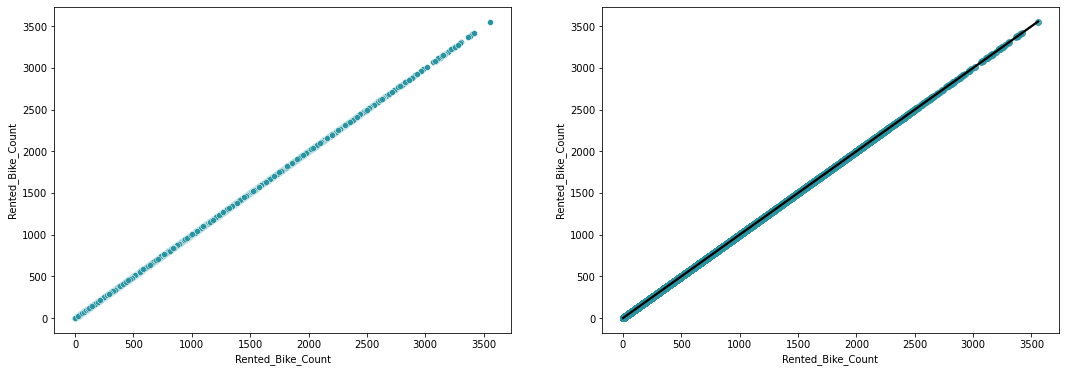

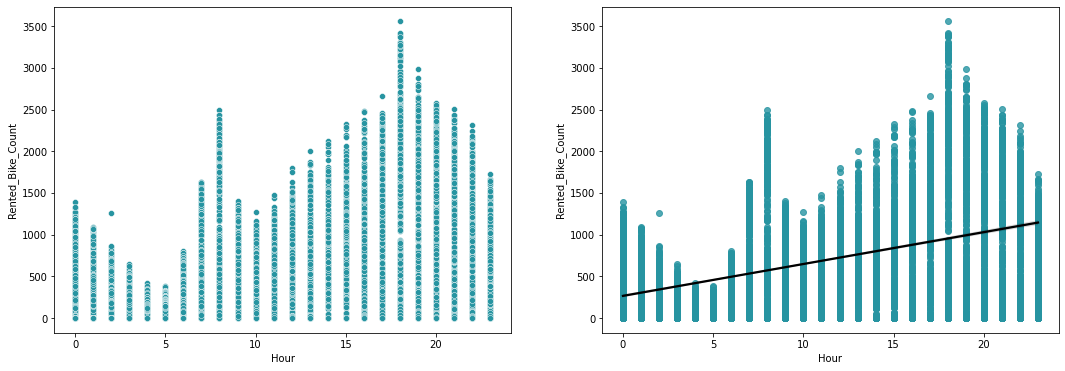

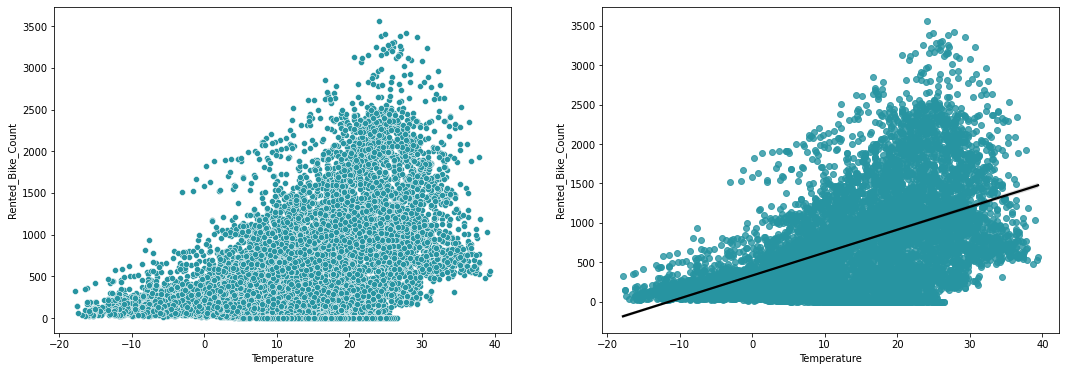

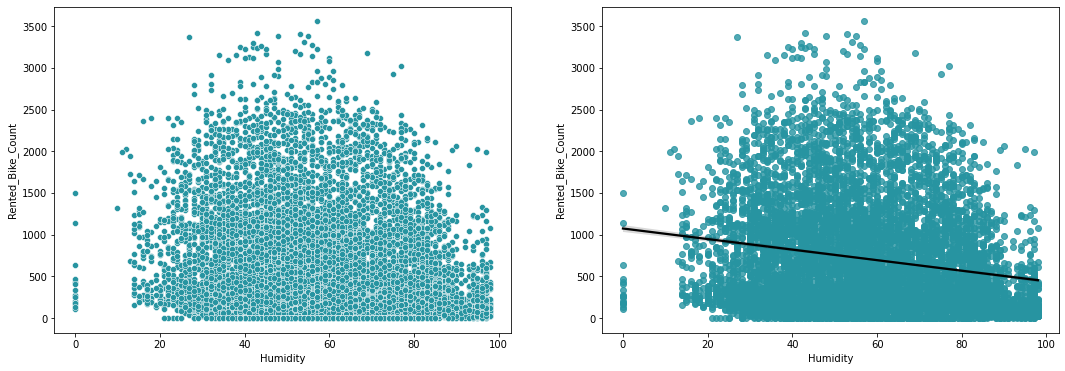

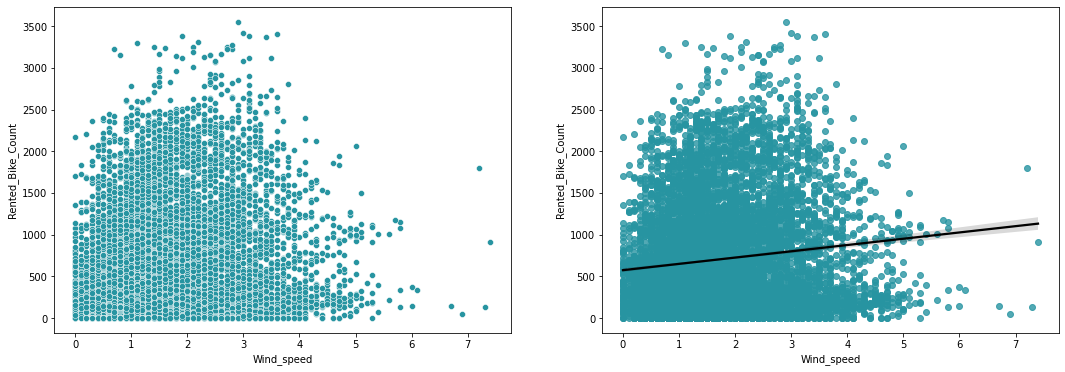

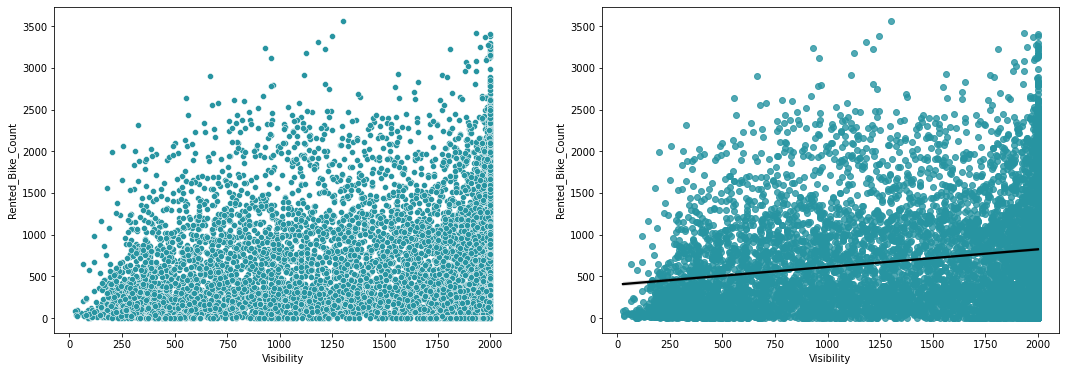

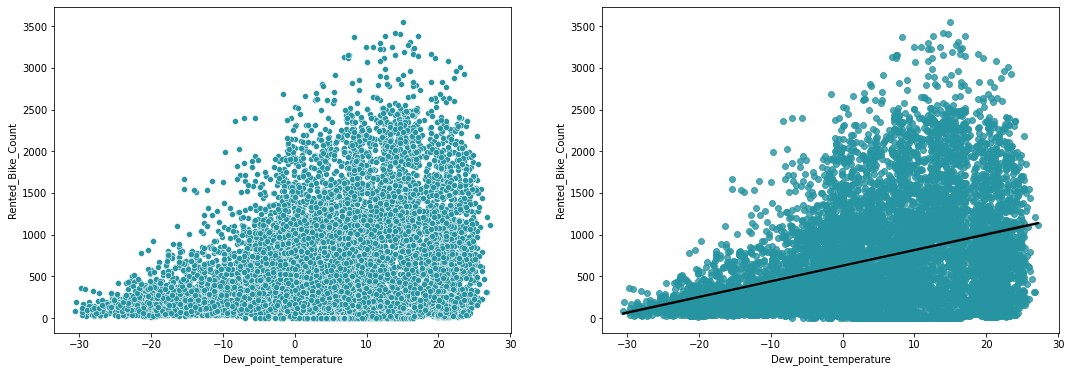

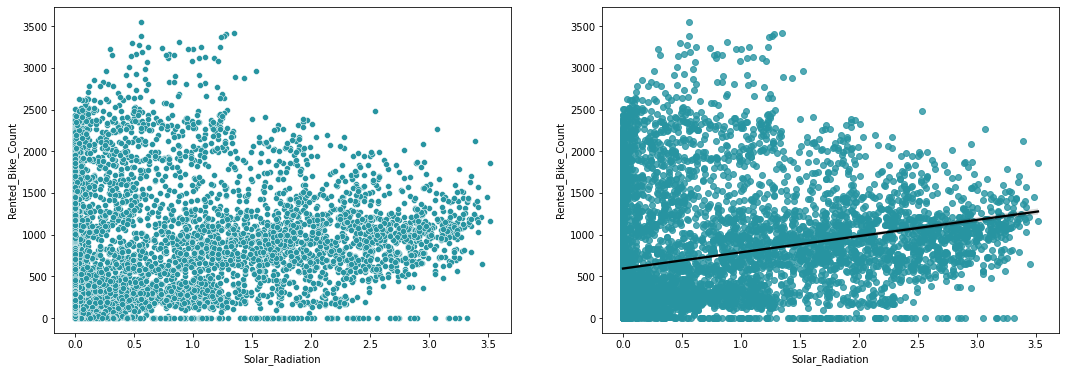

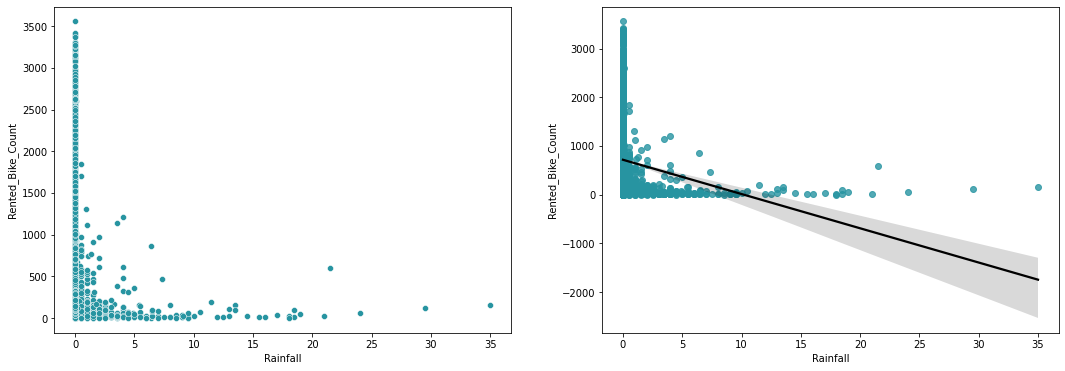

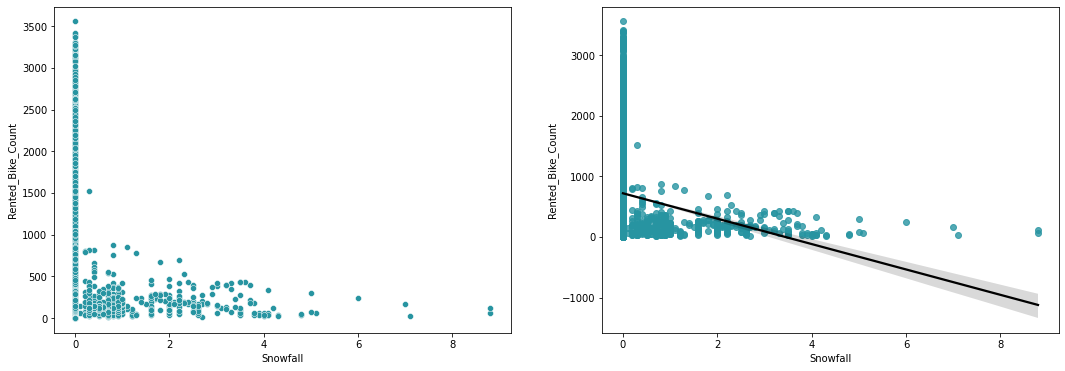

In [41]:
# Bivariate analysis on numarical columns with 

for i in numarical_column:
 fig = plt.figure(figsize=(18, 6))
 plt.subplot(1,2,1)
 sns.scatterplot(y=bike['Rented_Bike_Count'],x=bike[i],color='#2794a1')
 plt.subplot(1,2,2)
 sns.regplot(x=bike[i],y=bike['Rented_Bike_Count'],scatter_kws={'color':'#2794a1'},line_kws={'color':'black'})
 plt.show()

### Multivariate Analysis

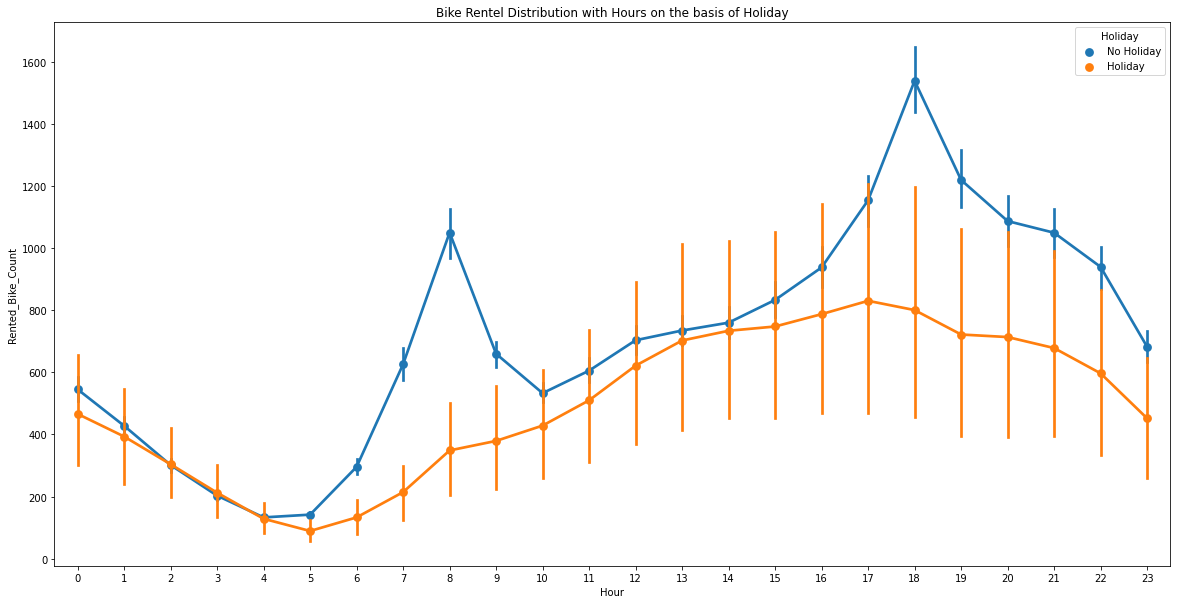

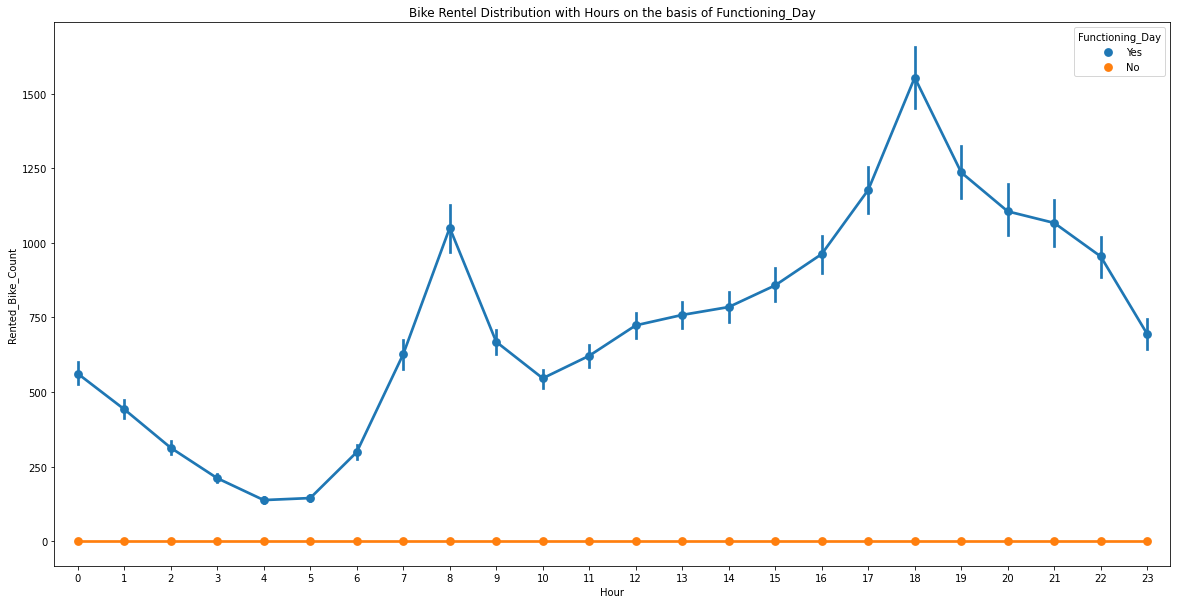

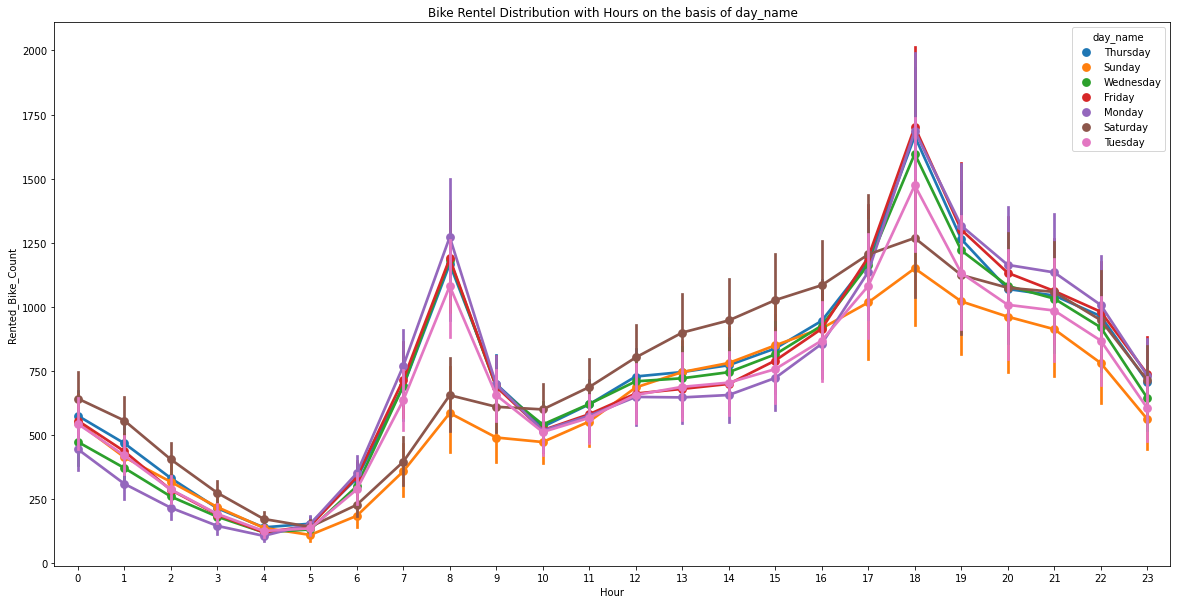

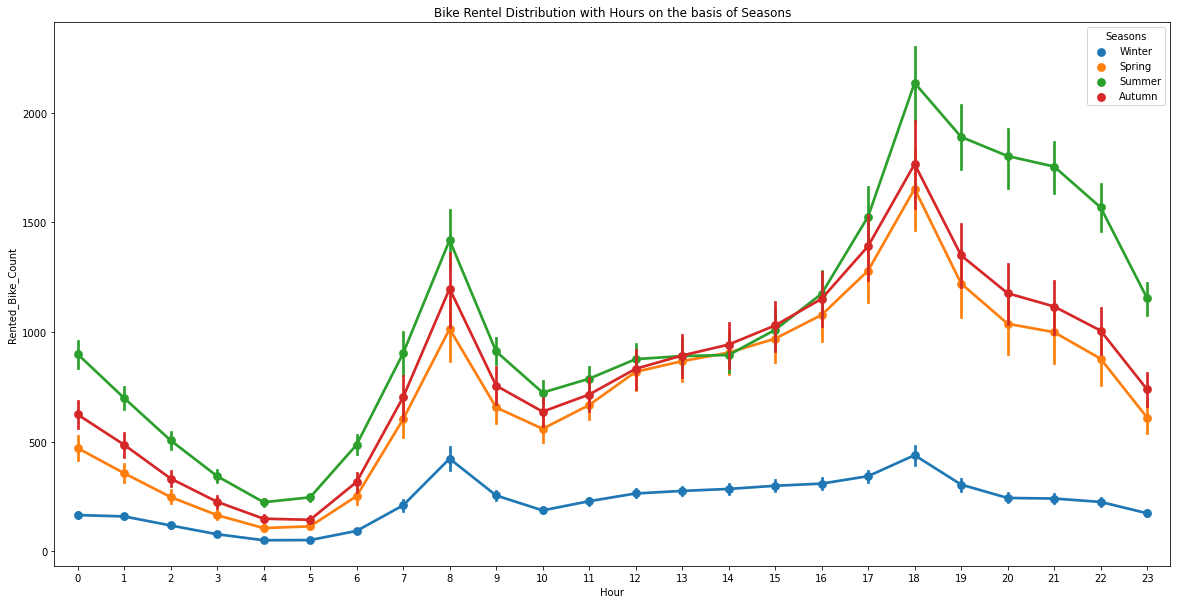

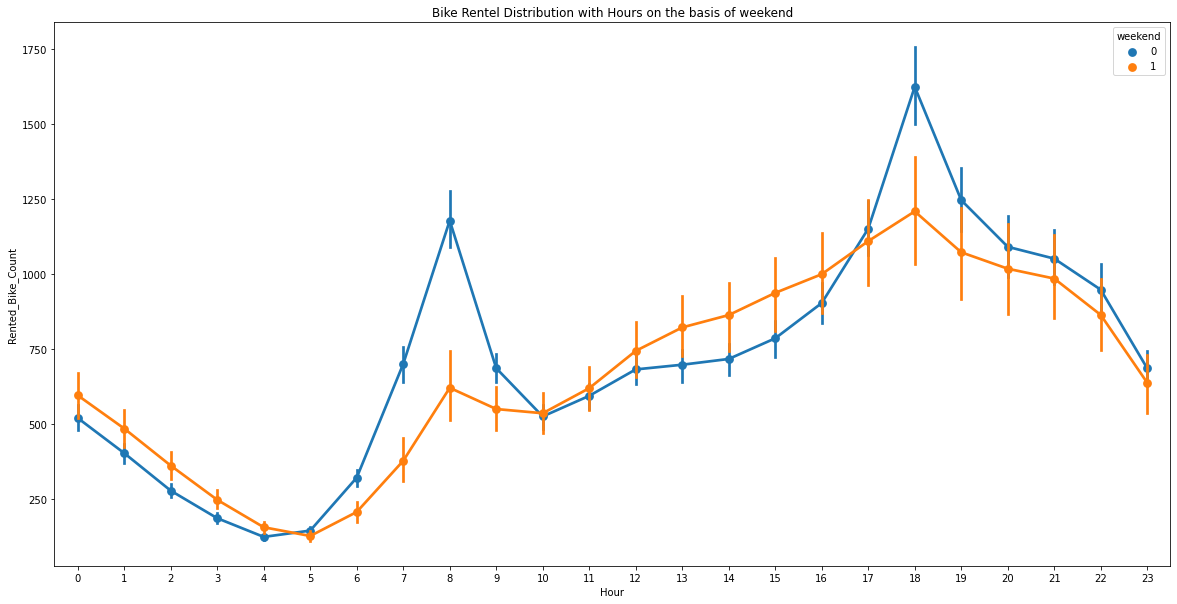

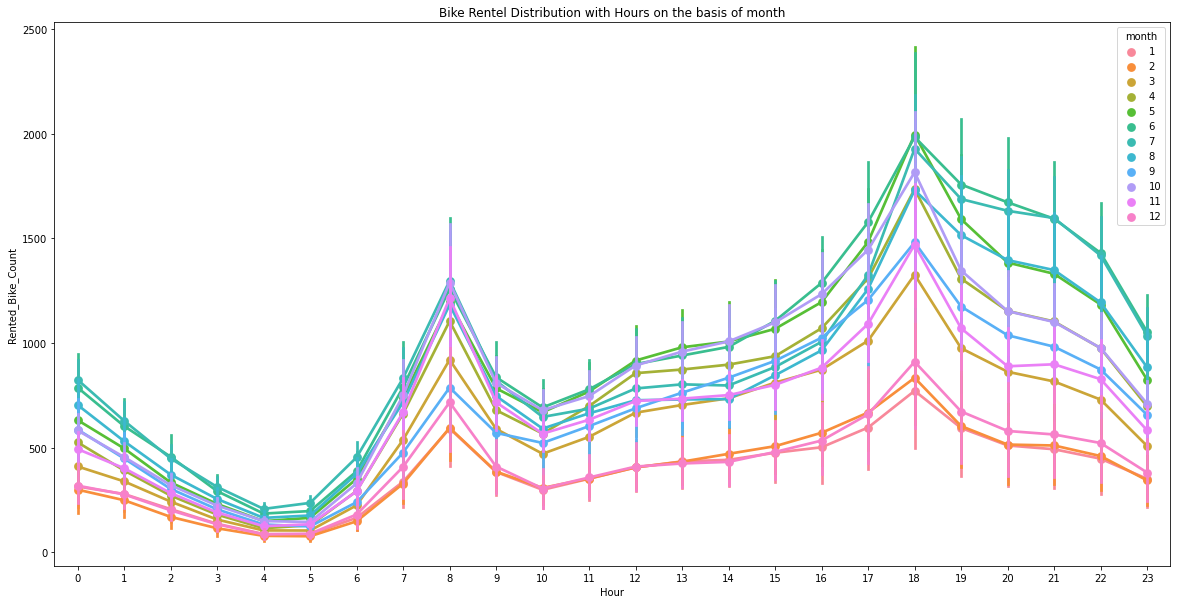

In [42]:
hue_list=['Holiday', 'Functioning_Day','day_name','Seasons', 'weekend', 'month']
for i in hue_list:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=bike['Hour'],y=bike['Rented_Bike_Count'],hue=bike[i])
 plt.title(f"Bike Rentel Distribution with Hours on the basis of {i}")
 plt.show()

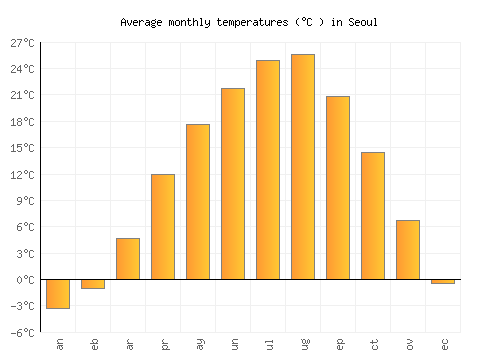

# **Data Prepration for machine learning model**

### Normalization of the distributions

#### target variable normalization

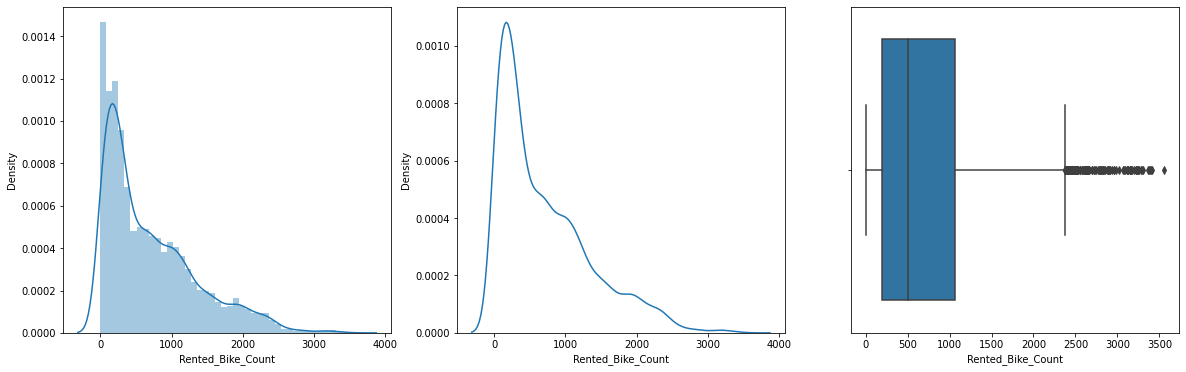

In [43]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(bike['Rented_Bike_Count'])
plt.subplot(1,3,2)
sns.kdeplot(bike['Rented_Bike_Count'])
plt.subplot(1,3,3)
sns.boxplot(bike['Rented_Bike_Count'])

**According to skewed data, If skewness is**
* Moderate - Sqrt tranform
* High - normal log tranform
* higher - log base 10 tranform
* Extreme - reciprocal/inverse transform

In [44]:
# Apply sqrt transformations on target variable because this is moderate right skewed

transformed_target_variable=np.sqrt(bike['Rented_Bike_Count'])

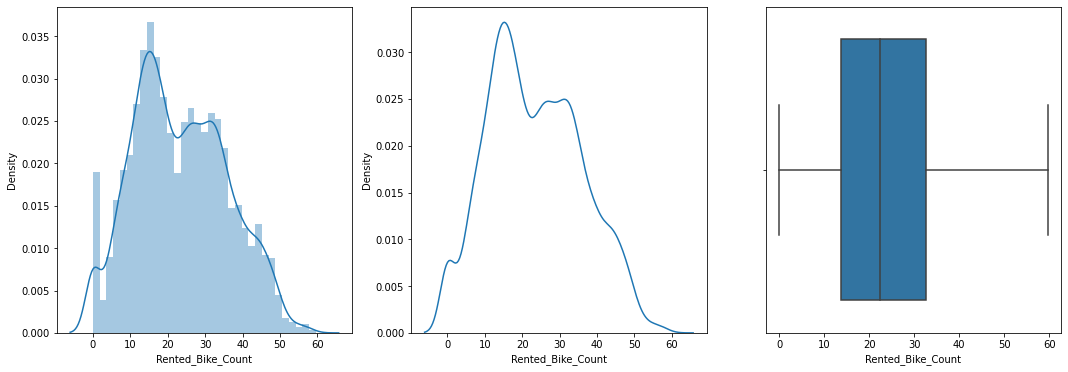

In [45]:
# Apply sqrt transformations on target variable because this is moderate right skewed

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.distplot(transformed_target_variable)
plt.subplot(1,3,2)
sns.kdeplot(transformed_target_variable)
plt.subplot(1,3,3)
sns.boxplot(transformed_target_variable)

#### Nornalizing the numarical feature with sqrt tranform

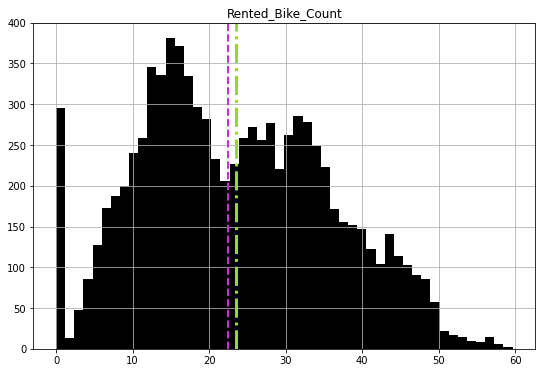

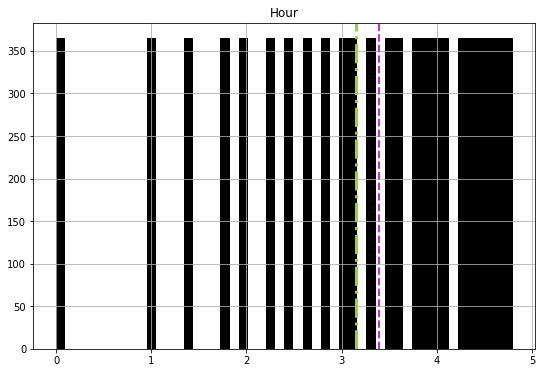

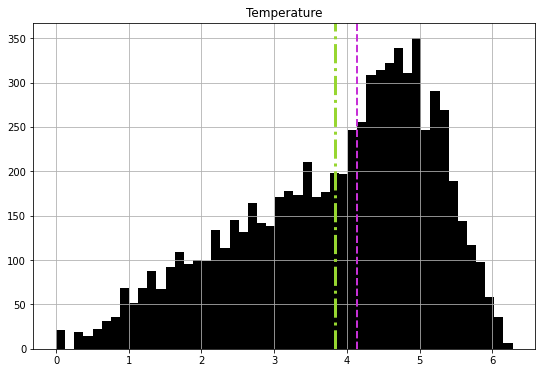

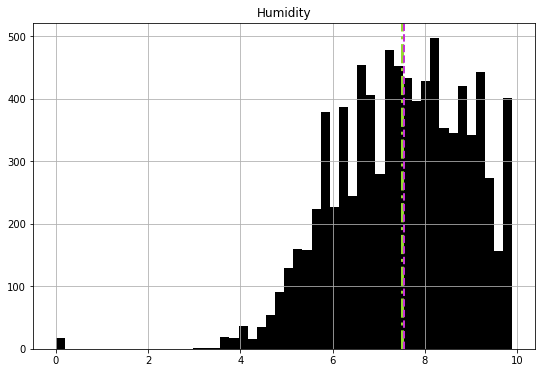

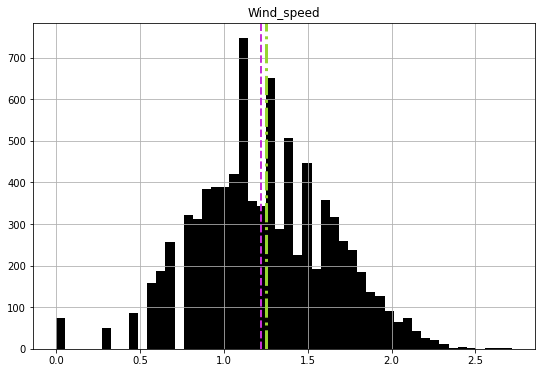

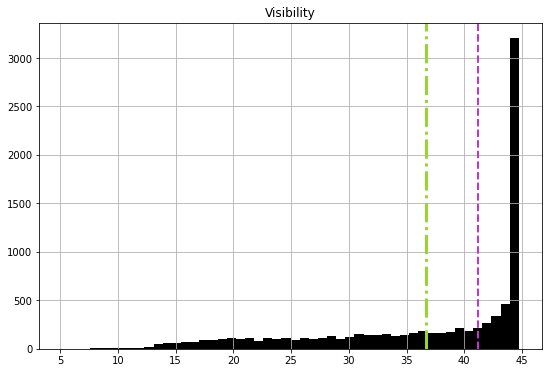

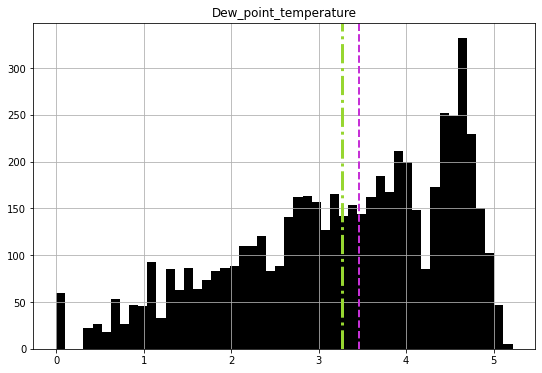

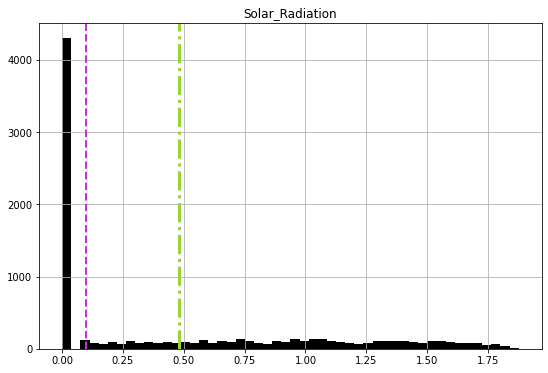

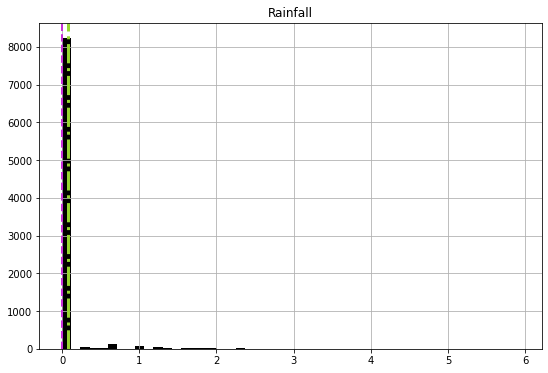

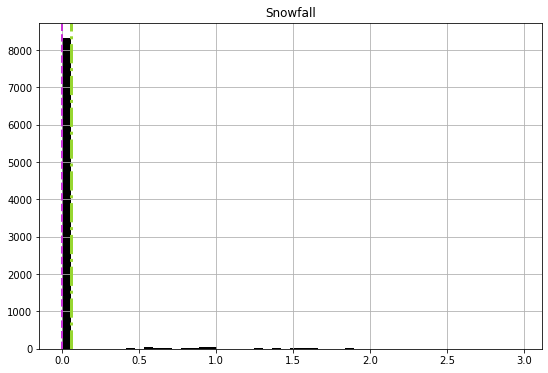

In [46]:
for col in numarical_column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike[col])
    feature.hist(bins=50, ax = ax,color='black')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

After tranformation is come closer to the normal distribution but not perfectly normal but its okay 

### let's find out the correation between each variables

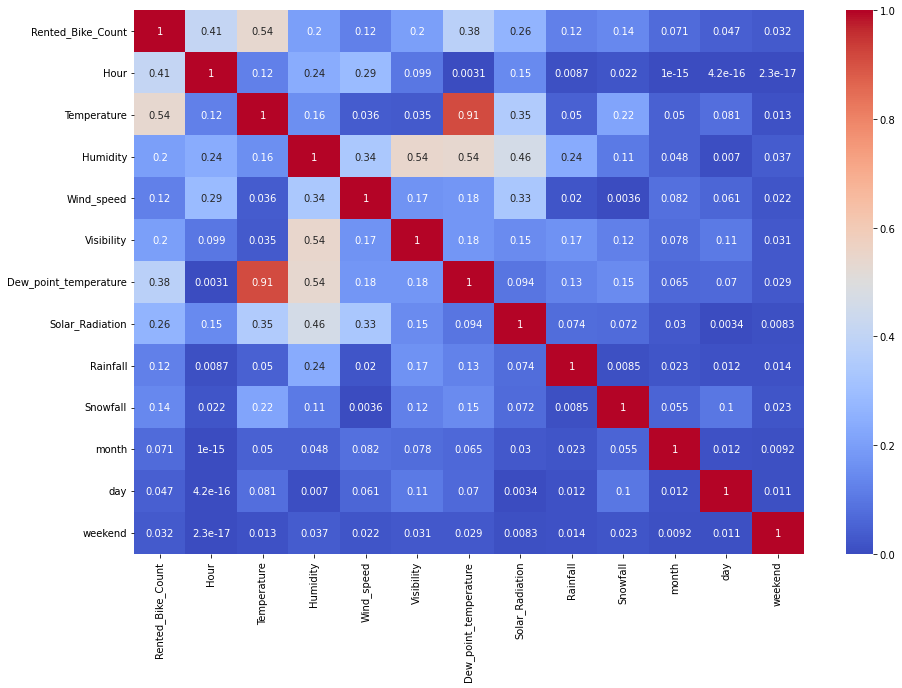

In [47]:
correlation_=bike.corr()
fig = plt.figure(figsize=(15, 10))
sns.heatmap(data=abs(correlation_),annot=True,cmap='coolwarm')

## ***Data Prepration For Modeling***

### make a copy of dataset

In [48]:
df=bike.copy()

In [49]:
# Check the dataset 

df.sample()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
5369               1915    17         27.9        75         2.5        1643   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
5369                   23.0             0.75       0.0       0.0  Summer   

         Holiday Functioning_Day  month  day day_name  weekend  
5369  No Holiday             Yes     12    7   Friday        0

In [50]:
# Drop the column of dew point temperature because of reducing Multicollinearity

df.drop(['Dew_point_temperature'],axis=1,inplace=True)

In [51]:
# Drop the day_name column because of we have alternate of it 

df.drop(['day_name'],axis=1,inplace=True)

In [52]:
# lets see how our dataset looks 

df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

   month  day  weekend  
0      1   12        0  
1      1   12        0  
2      1   12        0  
3      1   12        0  
4      1   12        0

### Check Multicollinearity using variance_inflation_factor(VIF)

In [53]:
# Multicollinearity calculation function

from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
# caculate vif of our dataset with removing our target variable

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0              Hour  4.003324
1       Temperature  3.243151
2          Humidity  6.849374
3        Wind_speed  4.622382
4        Visibility  5.521674
5   Solar_Radiation  2.286315
6          Rainfall  1.081698
7          Snowfall  1.137598
8             month  4.606088
9               day  3.852824
10          weekend  1.400900

In [55]:
# removing variables with high vif values

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0             Hour  3.993565
1      Temperature  2.664934
2       Wind_speed  4.366713
3       Visibility  5.500992
4  Solar_Radiation  1.902310
5         Rainfall  1.046925
6         Snowfall  1.111268
7            month  3.945685
8              day  3.439256
9          weekend  1.382196

In [56]:
# removing variables with high vif values

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0             Hour  3.857855
1      Temperature  2.638554
2       Wind_speed  3.894863
3  Solar_Radiation  1.900662
4         Rainfall  1.030985
5         Snowfall  1.103299
6            month  3.398803
7              day  3.332746
8          weekend  1.363051

In [57]:
# Drop the humidity feature bases on its vif value

df.drop(['Humidity'],axis=1,inplace=True)

In [58]:
# Drop the visibility feature bases on its vif value

df.drop(['Visibility'],axis=1,inplace=True)

In [59]:
df.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   
3                107     3         -6.2         0.9              0.0   
4                 78     4         -6.0         2.3              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_Day  month  day  weekend  
0       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
1       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
2       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
3       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
4       0.0       0.0  Winter  No Holiday             Yes      1   12        0

In [60]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [61]:
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [62]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [63]:
# Holiday is a categorical column so convert it into numarical

df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [64]:
df.sample()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
3656                555     8         17.5         0.9             0.06   

      Rainfall  Snowfall  Holiday Functioning_Day  month  day  weekend  \
3656       0.0       0.0        0             Yes      2    5        0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
3656               1               0               0

In [65]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [66]:
# Functioning_day is a categorical column so convert it into numarical

df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning_Day    8760 non-null   int64  
 9   month              8760 non-null   int64  
 10  day                8760 non-null   int64  
 11  weekend            8760 non-null   int64  
 12  Seasons_Spring     8760 non-null   uint8  
 13  Seasons_Summer     8760 non-null   uint8  
 14  Seasons_Winter     8760 non-null   uint8  
dtypes: float64(5), int64(7), uint8(3)
memory usage: 847.0 KB


In [68]:
df.sample(5)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
1179                 93     3         -0.6         1.7              0.0   
332                 277    20         -4.8         1.1              0.0   
5952                707     0         28.7         2.2              0.0   
2209                229     1          0.6         0.4              0.0   
2444                801    20          9.4         2.1              0.0   

      Rainfall  Snowfall  Holiday  Functioning_Day  month  day  weekend  \
1179       0.0       0.0        0                1      1   19        0   
332        0.0       0.0        0                1     12   14        0   
5952       0.0       0.0        0                1      6    8        0   
2209       0.0       0.0        0                1      3    3        1   
2444       0.0       0.0        0                1     12    3        0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
1179               0               0               1  
332                0               0               1  
5952               0               1               0  
2209               1               0               0  
2444               1               0               0

In [69]:
# check for the data type of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning_Day    8760 non-null   int64  
 9   month              8760 non-null   int64  
 10  day                8760 non-null   int64  
 11  weekend            8760 non-null   int64  
 12  Seasons_Spring     8760 non-null   uint8  
 13  Seasons_Summer     8760 non-null   uint8  
 14  Seasons_Winter     8760 non-null   uint8  
dtypes: float64(5), int64(7), uint8(3)
memory usage: 847.0 KB


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [73]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [74]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [75]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [76]:
# Expand Contraction

#### 2. Lower Casing

In [77]:
# Lower Casing

#### 3. Removing Punctuations

In [78]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [79]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [80]:
# Remove Stopwords

In [81]:
# Remove White spaces

#### 6. Rephrase Text

In [82]:
# Rephrase Text

#### 7. Tokenization

In [83]:
# Tokenization

#### 8. Text Normalization

In [84]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [85]:
# POS Taging

#### 10. Text Vectorization

In [86]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [87]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [89]:
# Transform Your data

### 6. Data Scaling

In [90]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [91]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [92]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [93]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [94]:
x=df.drop(['Rented_Bike_Count'],axis=1)
y=np.sqrt(df['Rented_Bike_Count'])

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [96]:
for i in [x_train,x_test,y_train,y_test]:
  print(i.shape)

(6570, 14)
(2190, 14)
(6570,)
(2190,)


In [97]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=min_max.fit_transform(x_train)
x_test=min_max.transform(x_test)

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
lr.coef_

array([ 13.21413035,  23.00853962,   2.46553824,   3.97233009,
       -67.7890697 , -10.5279705 ,  -2.53627475,  28.19011382,
         0.96272088,   0.58292935,  -0.53753148,  -3.22038937,
        -3.35777676,  -6.95263852])

In [101]:
lr.intercept_

-20.73084653238608

In [102]:
y_predict_train=lr.predict(x_train)

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.87643930620335 60.56305949447848 7.782227155157994 0.6107931666315705


In [104]:
lr_train_dict={'Model':"Linear Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [105]:
traning_performance=pd.DataFrame(lr_train_dict,index=[1])
traning_performance

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8764  60.5631  7.7822    0.6108

In [106]:
y_predict=lr.predict(x_test)

In [107]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.78248876828358 57.48470146128528 7.581866621174846 0.624732112412902


In [108]:
lr_test_dict={'Model':"Linear Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [109]:
test_performance=pd.DataFrame(lr_test_dict,index=[1])
test_performance

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.7825  57.4847  7.5819    0.6247

In [110]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_predict,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_predict,scatter_kws={'color':'#2794a1'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

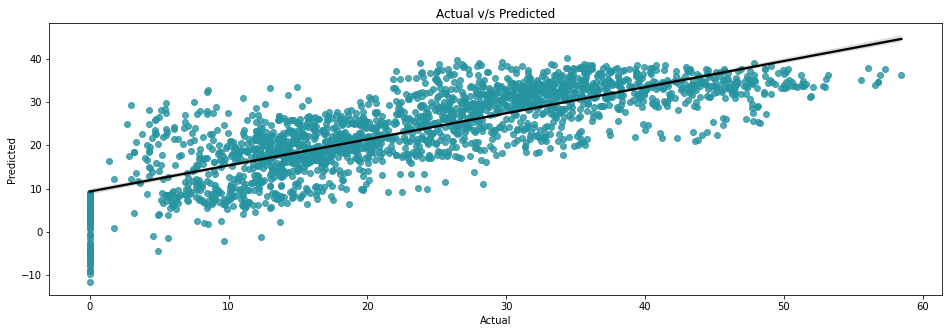

In [111]:
plot_scatter(y_predict,y_test)

### lasso

In [112]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)

In [113]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [114]:
lasso.coef_

array([ 13.24327664,  22.20395395,   1.86393965,   4.16464073,
       -58.84953458,  -6.03296937,  -2.23329415,  27.73860607,
         0.86757486,   0.4041282 ,  -0.47081345,  -3.04072797,
        -2.99604748,  -7.06294534])

In [115]:
lasso.intercept_

-19.85351079843486

In [116]:
lasso.score(x_train,y_train)

0.609755980021967

In [117]:
lasso.score(x_test,y_test)

0.6212896820907564

In [118]:
y_predict_train=lasso.predict(x_train)

In [119]:
y_predict=lasso.predict(x_test)

In [120]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.891626968607316 60.72445232974979 7.792589577909887 0.609755980021967


In [121]:
lasso_train_dict={'Model':"Lasso Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [122]:
traning_performance=traning_performance.append(lasso_train_dict,ignore_index=True)

In [123]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.801611313764016 58.01202363809661 7.6165624554714055 0.6212896820907564


In [124]:
lasso_test_dict={'Model':"Lasso Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [125]:
test_performance=test_performance.append(lasso_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.7825  57.4847  7.5819    0.6247
1   Lasso Regression  5.8016  58.0120  7.6166    0.6213

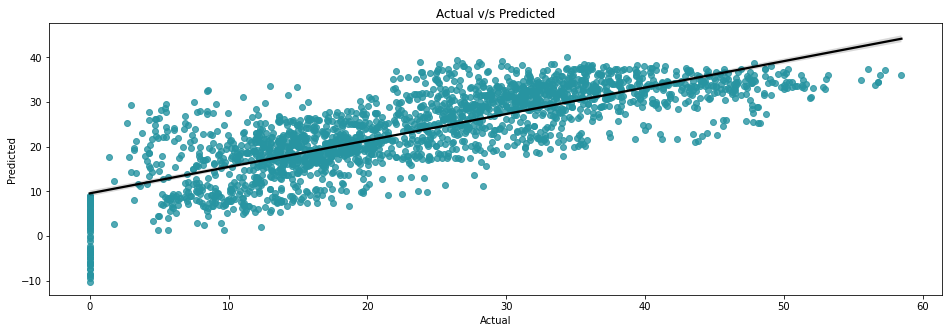

In [126]:
plot_scatter(y_predict,y_test)

### Ridge

In [127]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [128]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [129]:
ridge.coef_

array([ 13.21339708,  22.97020426,   2.46015768,   3.99006678,
       -66.86798753, -10.46388265,  -2.53326102,  28.17448055,
         0.96414411,   0.58190946,  -0.53673913,  -3.22012017,
        -3.3505518 ,  -6.95833712])

In [130]:
ridge.intercept_

-20.702027624442792

In [131]:
y_predict_train=ridge.predict(x_train)
y_predict=ridge.predict(x_test)

In [132]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.877410290988818 60.56402642608749 7.7822892792601515 0.6107869526722236


In [133]:
ridge_train_dict={'Model':"Ridge Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [134]:
traning_performance=traning_performance.append(ridge_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8764  60.5631  7.7822    0.6108
1   Lasso Regression  5.8916  60.7245  7.7926    0.6098
2   Ridge Regression  5.8774  60.5640  7.7823    0.6108

In [135]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.783577444159729 57.52007120755608 7.584198784812808 0.6245012139367836


In [136]:
ridge_test_dict={'Model':"Ridge Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [137]:
test_performance=test_performance.append(ridge_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.7825  57.4847  7.5819    0.6247
1   Lasso Regression  5.8016  58.0120  7.6166    0.6213
2   Ridge Regression  5.7836  57.5201  7.5842    0.6245

### ElasticNet

In [138]:
from sklearn.linear_model import ElasticNet
En=ElasticNet(alpha=0.001,l1_ratio=0.5)

In [139]:
En.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [140]:
En.coef_

array([ 13.20205642,  21.80817928,   2.29322303,   4.42321252,
       -46.36360228,  -8.58663043,  -2.43634952,  27.656435  ,
         0.98044165,   0.55895729,  -0.51613402,  -3.18878124,
        -3.08707216,  -7.14740514])

In [141]:
En.intercept_

-19.743515944244976

In [142]:
y_predict_train=En.predict(x_train)
y_predict=En.predict(x_test)

In [143]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.914393400867451 61.10024871701602 7.816664807769105 0.6073409348921461


In [144]:
En_train_dict={'Model':"ElasticNet Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [145]:
traning_performance=traning_performance.append(En_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0      Linear Regression  5.8764  60.5631  7.7822    0.6108
1       Lasso Regression  5.8916  60.7245  7.7926    0.6098
2       Ridge Regression  5.8774  60.5640  7.7823    0.6108
3  ElasticNet Regression  5.9144  61.1002  7.8167    0.6073

In [146]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.824705856646372 58.71122396076544 7.662324970970981 0.616725208040824


In [147]:
En_test_dict={'Model':"ElasticNet Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [148]:
test_performance=test_performance.append(En_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0      Linear Regression  5.7825  57.4847  7.5819    0.6247
1       Lasso Regression  5.8016  58.0120  7.6166    0.6213
2       Ridge Regression  5.7836  57.5201  7.5842    0.6245
3  ElasticNet Regression  5.8247  58.7112  7.6623    0.6167

### Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor

D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

D_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [150]:
y_predict_train=D_tree.predict(x_train)
y_predict=D_tree.predict(x_test)

In [151]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.8591466162382297 18.130703114317896 4.258016335609564 0.8834835359248959


In [152]:
Dtree_train_dict={'Model':"Decision Tree Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [153]:
traning_performance=traning_performance.append(Dtree_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0         Linear Regression  5.8764  60.5631  7.7822    0.6108
1          Lasso Regression  5.8916  60.7245  7.7926    0.6098
2          Ridge Regression  5.8774  60.5640  7.7823    0.6108
3     ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4  Decision Tree Regression  2.8591  18.1307  4.2580    0.8835

In [154]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

3.386840673734514 24.185777187686618 4.917903739164342 0.8421119831162737


In [155]:
Dtree_test_dict={'Model':"Decision Tree Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [156]:
test_performance=test_performance.append(Dtree_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0         Linear Regression  5.7825  57.4847  7.5819    0.6247
1          Lasso Regression  5.8016  58.0120  7.6166    0.6213
2          Ridge Regression  5.7836  57.5201  7.5842    0.6245
3     ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4  Decision Tree Regression  3.3868  24.1858  4.9179    0.8421

#### Hyperperameter tuning

In [157]:
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae","squared_error","poisson"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [159]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae', 'squared_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [160]:
tuning_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [161]:
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto',criterion='squared_error')

D_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [162]:
y_predict_train=D_tree.predict(x_train)
y_predict=D_tree.predict(x_test)

In [163]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.8591466162382297 18.1307031143179 4.258016335609564 0.8834835359248959


In [164]:
Ht_Dtree_train_dict={'Model':"Decision Tree Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [165]:
traning_performance=traning_performance.append(Ht_Dtree_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835

In [166]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

3.3876577467091957 24.08340271749613 4.907484357335857 0.8427802974711304


In [167]:
Ht_Dtree_test_dict={'Model':"Decision Tree Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [168]:
test_performance=test_performance.append(Ht_Dtree_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4                Decision Tree Regression  3.3868  24.1858  4.9179    0.8421
5  Decision Tree Regression(Hyper Tuning)  3.3877  24.0834  4.9075    0.8428

### Random Forest 

In [169]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [170]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [171]:
y_predict_train=rf.predict(x_train)
y_predict=rf.predict(x_test)

In [172]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

0.8812739671794803 1.8851607426459005 1.3730115595456218 0.9878850664223365


In [173]:
RandomFoorest_train_dict={'Model':"Random Forest Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [174]:
traning_performance=traning_performance.append(RandomFoorest_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8813   1.8852  1.3730    0.9879

In [175]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

2.3576750096813184 13.8824397438628 3.7259146184343517 0.9093735601855192


In [176]:
RandomForest_test_dict={'Model':"Random Forest Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [177]:
test_performance=test_performance.append(RandomForest_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4                Decision Tree Regression  3.3868  24.1858  4.9179    0.8421
5  Decision Tree Regression(Hyper Tuning)  3.3877  24.0834  4.9075    0.8428
6                Random Forest Regression  2.3577  13.8824  3.7259    0.9094

#### Hyperparameter Tuning

In [182]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [183]:
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [184]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 40}

In [185]:
rf=RandomForestRegressor(max_depth=9, n_estimators=40)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=40)

In [186]:
y_predict_train=rf.predict(x_train)
y_predict=rf.predict(x_test)

In [187]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.5824485983551715 14.38576524492294 3.792857134789411 0.9075502759719639


In [188]:
Ht_RandomFoorest_train_dict={'Model':"Random Forest Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [189]:
traning_performance=traning_performance.append(Ht_RandomFoorest_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8813   1.8852  1.3730    0.9879
7  Random Forest Regression(Hyper Tuning)  2.5824  14.3858  3.7929    0.9076

In [190]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

2.981568257107446 19.325761590188044 4.396107549888656 0.8738388207017821


In [191]:
Ht_RandomForest_test_dict={'Model':"Random Forest Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [192]:
test_performance=test_performance.append(Ht_RandomForest_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4                Decision Tree Regression  3.3868  24.1858  4.9179    0.8421
5  Decision Tree Regression(Hyper Tuning)  3.3877  24.0834  4.9075    0.8428
6                Random Forest Regression  2.3577  13.8824  3.7259    0.9094
7  Random Forest Regression(Hyper Tuning)  2.9816  19.3258  4.3961    0.8738

### Xgboost

In [198]:
import xgboost as xg
xgb=xg.XGBRegressor()

In [179]:
xgb.fit(x_train,y_train)

[15:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [180]:
y_predict_train=xgb.predict(x_train)
y_predict=xgb.predict(x_test)

In [181]:
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

3.133591934456839 19.923476383463367 4.463572155064077 0.8719623279004682


In [193]:
Xgb_train_dict={'Model':"Xgb Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [194]:
traning_performance=traning_performance.append(Xgb_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8813   1.8852  1.3730    0.9879
7  Random Forest Regression(Hyper Tuning)  2.5824  14.3858  3.7929    0.9076
8                          Xgb Regression  2.9816  19.3258  4.3961    0.8738

In [195]:
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

2.981568257107446 19.325761590188044 4.396107549888656 0.8738388207017821


In [196]:
Xgb_test_dict={'Model':"Xgb Regrssion",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [197]:
test_performance=test_performance.append(Xgb_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4                Decision Tree Regression  3.3868  24.1858  4.9179    0.8421
5  Decision Tree Regression(Hyper Tuning)  3.3877  24.0834  4.9075    0.8428
6                Random Forest Regression  2.3577  13.8824  3.7259    0.9094
7  Random Forest Regression(Hyper Tuning)  2.9816  19.3258  4.3961    0.8738
8                           Xgb Regrssion  2.9816  19.3258  4.3961    0.8738

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***